# Analysis of Job Factors in the Tech Industry – Stack Overflow Developer Survey    
 Stack Overflow Developer Survey

### Team Members
* Prashanth Baskar
* Bhuvan Dama Venkatesh Raj
* Aswin Lakshmanan
* Kaviprakash Ramalingam

<br />
<center>
    <img src="data/2020.webp" width=400 />
</center>

### **Introduction**

The purpose of this project is to analyze the importance of various job factors in the tech industry, such as remote work options, company culture, and professional development opportunities. By understanding the key factors that influence job satisfaction and career choices among tech professionals, organizations can better tailor their offerings to attract and retain top talent.

In today's **job market**, compensation isn't always the deciding factor when it comes to securing top talent. While companies may dangle hefty paychecks, it's often other non-monetary factors that sway a worker's decision.

**But what are these elusive factors, and why do job seekers and employees deem them so important?**

This notebook sets out to unravel these mysteries. By delving into the Data Science framework, **we embark on a journey through the realms of business understanding, data comprehension, meticulous preparation, sophisticated modeling, insightful evaluation, and ultimately, drawing profound conclusions**. Join us as we uncover the essence of what truly makes a job appealing beyond just the dollar signs.




<br />
<center>
<img src="./data/giphy.gif" width=400 />
</center>



## We're on a quest to unravel the mysteries of job seekers' minds.
 
Starting simple: "What's their job wishlist?" Once we've got that down, it's time to get Sherlock Holmes on it:
 
1. **What goes together?** We're figuring out which factors tend to be picked at the same time and why.
2. **Any patterns?** Are there trends or habits in how people choose these factors?

## Exploratory Data Analysis (EDA)
•	Job Factors Distribution: Analyzing the distribution of responses for each job factor provides an overview of the factors that tech professionals prioritize.

•	Correlation Analysis: Correlating job factors with other variables, such as age, gender, and compensation, helps identify potential trends and relationships.





"In February 2020 nearly 65,000 developers told us how they learn and level up, which tools they’re using, and what they want." - Stack Overflow team

### Why this dataset from Stack overflow?????

### Approaching Data 
StackOverflow surveys are widely regarded as valuable resources for understanding the employment landscape and expectations of developers. The dataset used in the analysis is sourced from The Public 2020 Stack Overflow Developer Survey Results, conducted between February 5th and 28th, 2020, among StackOverflow users. The survey findings are accessible at https://insights.stackoverflow.com/survey. 


[Survey Dataset](https://data.world/technology/stack-overflow-developer-survey)

<br />
<center>
    <img src="data/sss.png" width=400 />
</center>

Come on almost all of us use Stack Overflow  !!!!


## Data Collection and Preprocessing

The file [survey_results_public.csv](data/survey_results_public.csv) contains the primary survey findings, structured with one respondent per row and one column per answer. Meanwhile, [survey_results_schema.csv](data/survey_results_schema.csv) is a CSV file outlining the survey's schema, matching each column name to its corresponding question.

•	Dataset: The dataset used in this analysis consists of survey responses from tech professionals across different countries and demographics.

•	Data Cleaning: Preprocessing steps include handling missing values, encoding categorical variables, and mapping non-continuous features to numerical values.

•	Feature Engineering: Features such as years of coding experience and age at first code are engineered to provide additional insights.


<br />
<center>
    <img src="data/pre.jpeg" width=400 />
</center>

In [181]:
## Wrangling
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import phik

## Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score
import xgboost as xgb
import shap

## Utils
from typing import List
from cycler import cycler
from tqdm.notebook import tqdm
import networkx as nx
import warnings



## Visualization
from matplotlib import ticker
from matplotlib.pyplot import Line2D
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import matplotlib.dates as mdates
import seaborn as sns

In [182]:
# Data loading
data = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv', index_col='Column')
print(data.shape, schema.shape)

(64461, 61) (61, 1)


The dataset contains **61 columns and 64,461 rows**, which corresponds closely to the survey website's claim of around **65,000** responses. To simplify the exploration of features, We've implemented a function that prints descriptions of fields matching the specified string.

In [183]:
def question(question: str, return_string=False, exact_match=False):
    
    if return_string and exact_match:
        return schema.at[question, 'QuestionText']
    
    for name in schema.index:
        if question.lower() in name.lower():
            print(f"{name}:\n{schema.at[name, 'QuestionText']}", end='\n\n')
    
question('Job') # Example

JobFactors:
Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?

JobSat:
How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)

JobSeek:
Which of the following best describes your current job-seeking status?

NEWJobHunt:
In general, what drives you to look for a new job? Select all that apply.

NEWJobHuntResearch:
When job searching, how do you learn more about a company? Select all that apply.



In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

<br />
<img src="data/dev.png" width=400 />


## Numeric Features


In [185]:
data.describe()

Respondent           Age      CompTotal  ConvertedComp   WorkWeekHrs
count  64461.000000  45446.000000   3.482600e+04   3.475600e+04  41151.000000
mean   32554.079738     30.834111  3.190464e+242   1.037561e+05     40.782174
std    18967.442360      9.585392            inf   2.268853e+05     17.816383
min        1.000000      1.000000   0.000000e+00   0.000000e+00      1.000000
25%    16116.000000     24.000000   2.000000e+04   2.464800e+04     40.000000
50%    32231.000000     29.000000   6.300000e+04   5.404900e+04     40.000000
75%    49142.000000     35.000000   1.250000e+05   9.500000e+04     44.000000
max    65639.000000    279.000000  1.111111e+247   2.000000e+06    475.000000

The information and visualizations presented above suggest that the dataset contains **erroneous data**. Specifically, the  **maximum age** recorded is an implausible **45446.000000 years**, and the highest **total compensation (CompTotal)** appears to be excessively high **(3.190464e+242)**. These findings emphasize the significance of cleaning and validating numeric data.

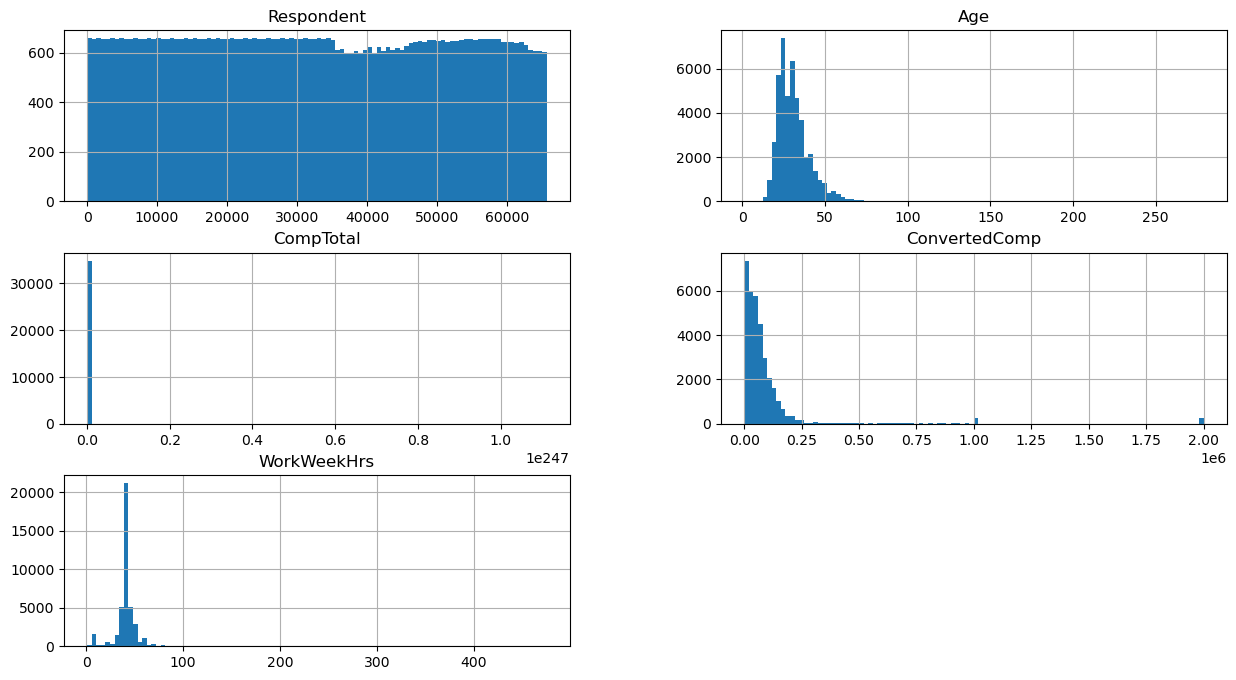

In [186]:
data.hist(figsize=(15,8), bins=100);

Indeed! The "Respondent" column serves as the index for individuals, and it's evident that as part of Stack Overflow's data-cleaning efforts, some individuals were omitted. This explains the uneven distribution of this feature. It's reassuring that the dataset has undergone some level of cleaning. However, there appear to be outliers present in other numerical fields, which is somewhat unexpected considering the lack of validation for these features. Hence we proceed with **Non-Numeric Values .**


## Non-numeric features

### plot_unique plots the non-numeric feautres

In [187]:
def plot_unique(min_nunique=2, max_nunique=5, colwrap=5, height=3, aspect=1.1):
    
    feat_to_plot = [feat for feat in data if data[feat].nunique() <= max_nunique and data[feat].nunique() >= min_nunique]
    data_melted = data[feat_to_plot].fillna('No answer provided').melt() 
    g = sns.FacetGrid(data_melted, 
                      col='variable', 
                      col_wrap=colwrap, 
                      sharex=False, 
                      height=height, 
                      aspect=aspect)
    
    g.map(sns.countplot, 'value')

    for ax in g.axes.ravel(): 
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.subplots_adjust(hspace=2, wspace=0.1)
    g.fig.suptitle(f'Count plot of features having number of unique values between {min_nunique} and {max_nunique}', y=1.05)

/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


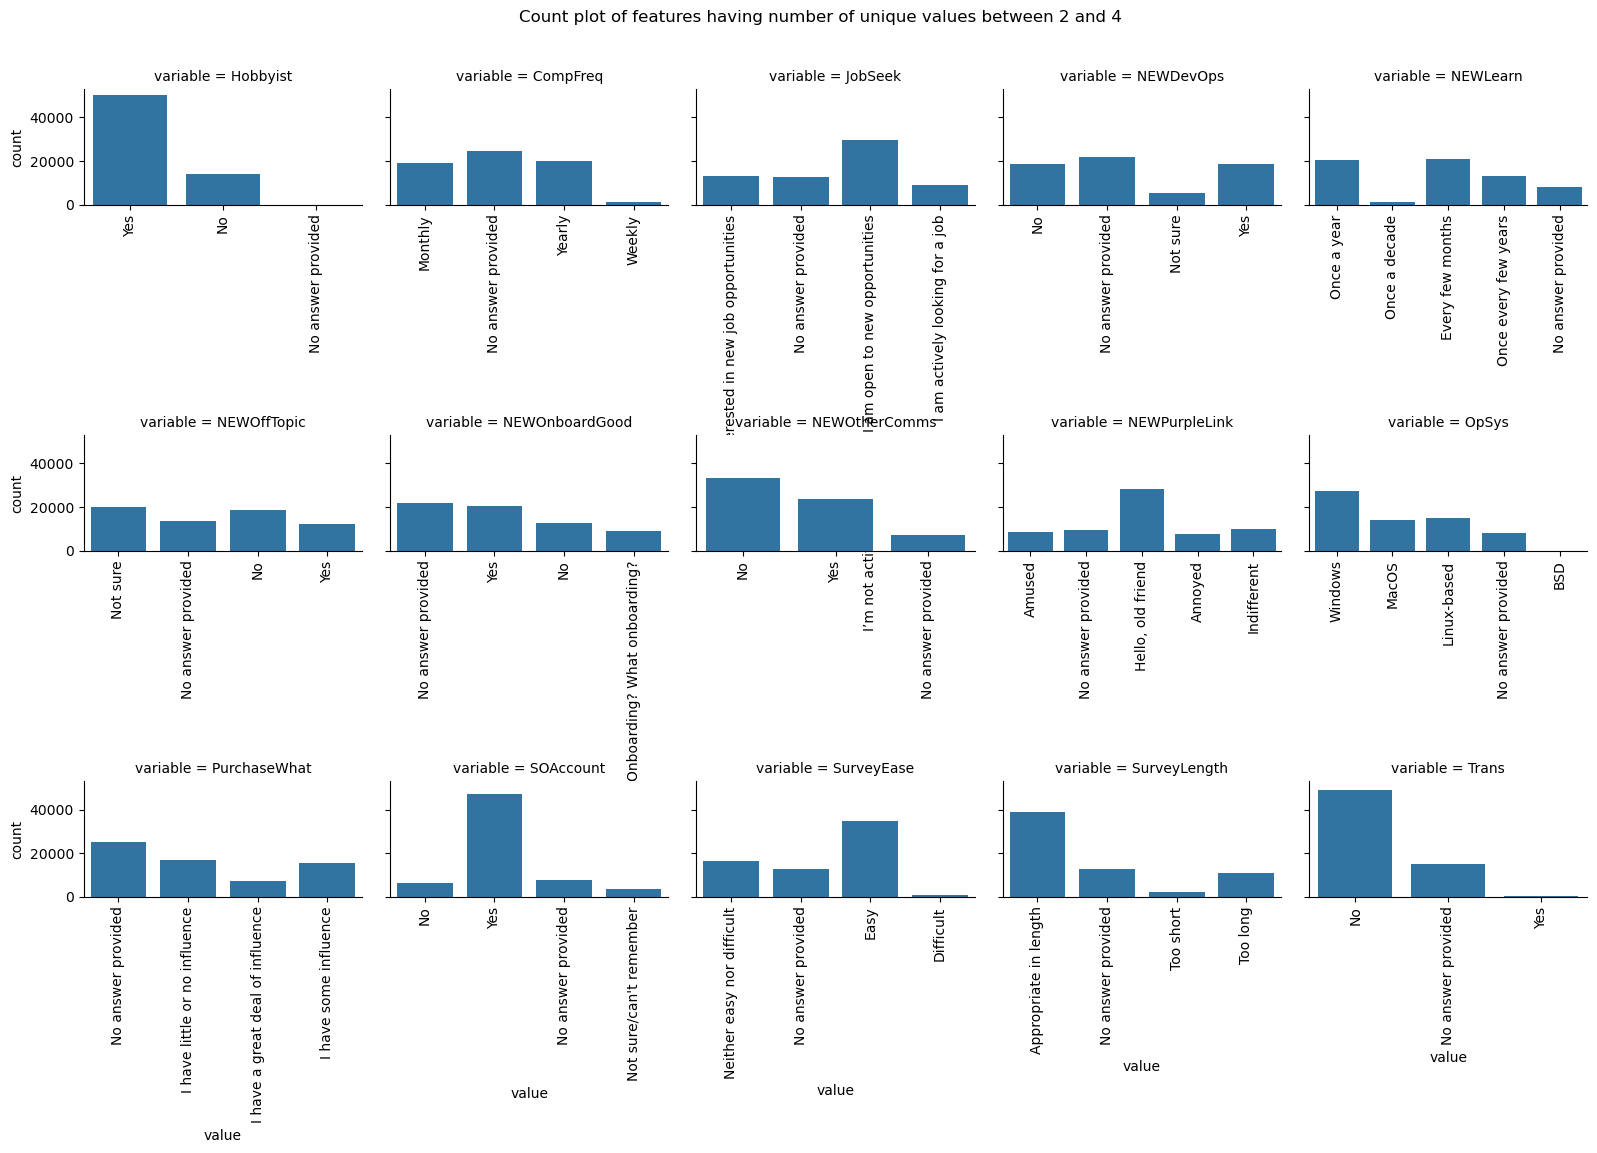

In [188]:
plot_unique(2, 4)

/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


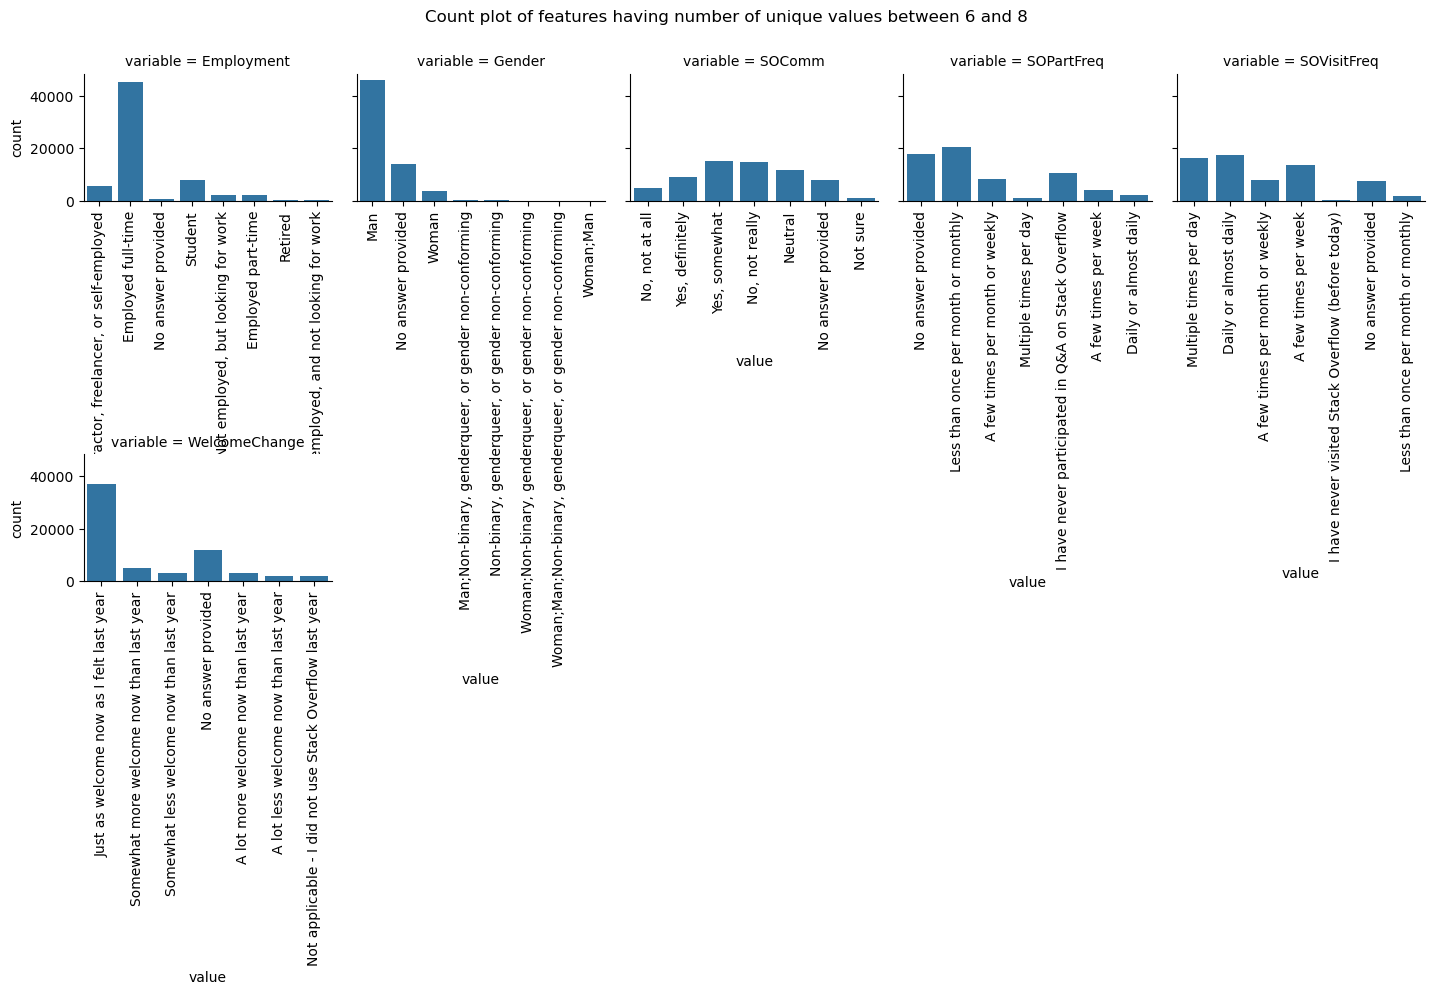

In [189]:
plot_unique(6, 8)

/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


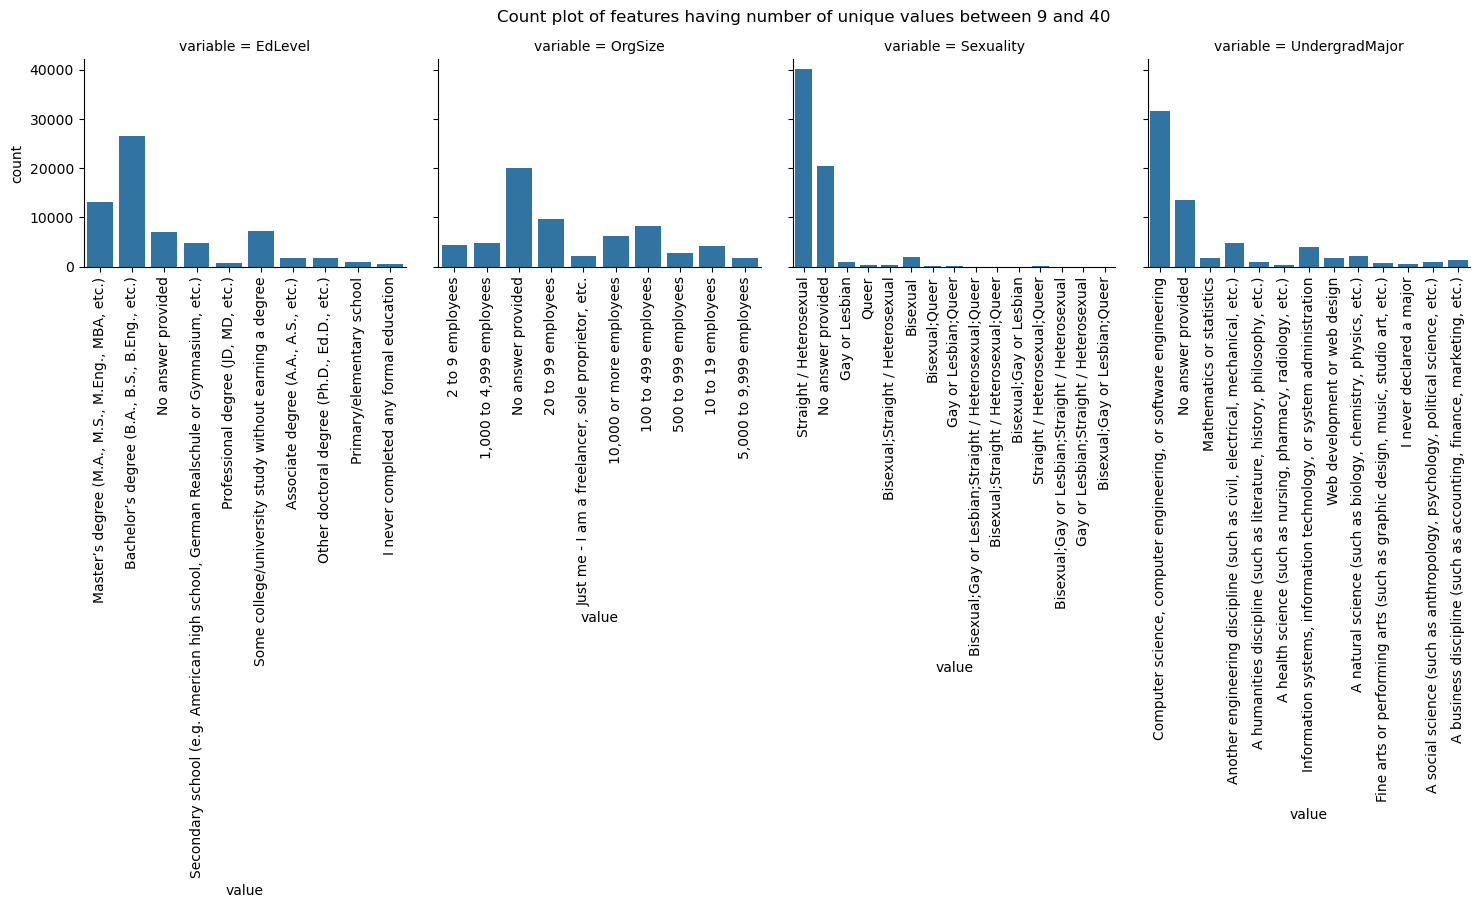

In [190]:
plot_unique(9, 40, aspect=1.5, colwrap=4)

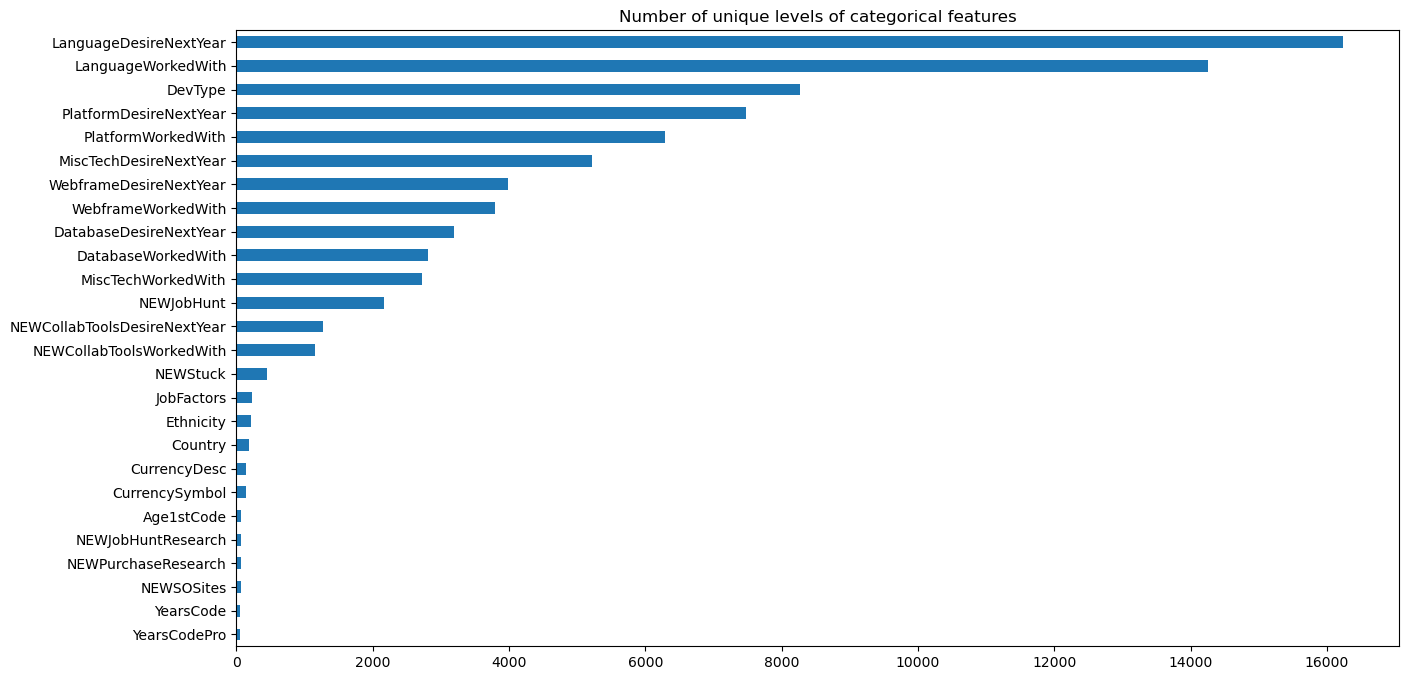

In [191]:
many_nunique_sections = data.select_dtypes('object').nunique().nlargest(26)
many_nunique_sections.sort_values().plot.barh(figsize=(15,8), title='Number of unique levels of categorical features');


In [192]:
data[many_nunique_sections.index].sample(5)

LanguageDesireNextYear  \
21787  Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;J...   
26392                                 Go;Kotlin;Python;R   
37020                                                NaN   
12485                       Dart;Kotlin;Swift;TypeScript   
62869                       HTML/CSS;Java;JavaScript;SQL   

                                      LanguageWorkedWith  \
21787  Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...   
26392  Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...   
37020                                                NaN   
12485  C;Go;Haskell;HTML/CSS;Java;JavaScript;Python;S...   
62869                                           Java;SQL   

                                                 DevType  \
21787  Data or business analyst;Database administrato...   
26392                              Developer, full-stack   
37020                                                NaN   
12485  Data scientist or machine learning specialist;...   
62869                                                NaN   

                                  PlatformDesireNextYear  \
21787  AWS;Docker;Google Cloud Platform;Kubernetes;Li...   
26392                Android;AWS;Docker;Kubernetes;Linux   
37020                                                NaN   
12485   Android;Docker;iOS;Kubernetes;MacOS;Raspberry Pi   
62869                              Android;Linux;Windows   

                                      PlatformWorkedWith  \
21787       AWS;Docker;Linux;Slack Apps and Integrations   
26392                                          AWS;Linux   
37020                                                NaN   
12485  Android;Arduino;Docker;Linux;MacOS;Raspberry P...   
62869                                      Linux;Windows   

                                  MiscTechDesireNextYear  \
21787  Apache Spark;Hadoop;Keras;Pandas;TensorFlow;Te...   
26392  Ansible;React Native;TensorFlow;Teraform;Torch...   
37020                                                NaN   
12485                                             Pandas   
62869                             Unity 3D;Unreal Engine   

               WebframeDesireNextYear                     WebframeWorkedWith  \
21787           Django;Laravel;Vue.js                          jQuery;Vue.js   
26392           Django;Flask;React.js                jQuery;React.js;Symfony   
37020                             NaN                                    NaN   
12485  Express;React.js;Spring;Vue.js  Express;jQuery;React.js;Spring;Vue.js   
62869                   jQuery;Spring                                    NaN   

                                  DatabaseDesireNextYear  \
21787  Couchbase;DynamoDB;Elasticsearch;MariaDB;MySQL...   
26392                     Elasticsearch;PostgreSQL;Redis   
37020                                                NaN   
12485                   Elasticsearch;MongoDB;PostgreSQL   
62869                            MySQL;Oracle;PostgreSQL   

                           DatabaseWorkedWith  ...  \
21787       DynamoDB;MariaDB;MySQL;PostgreSQL  ...   
26392                           MariaDB;MySQL  ...   
37020                                     NaN  ...   
12485  Elasticsearch;MongoDB;MySQL;PostgreSQL  ...   
62869                                   MySQL  ...   

                          Ethnicity             Country        CurrencyDesc  \
21787  White or of European descent        South Africa  South African rand   
26392                   South Asian               India        Indian rupee   
37020                           NaN           Sri Lanka                 NaN   
12485  White or of European descent         Switzerland         Swiss franc   
62869                           NaN  Russian Federation                 NaN   

      CurrencySymbol Age1stCode  \
21787            ZAR          9   
26392            INR         17   
37020            NaN        NaN   
12485            CHF         19   
62869            NaN        NaN   

               

We notice that certain features, like **YearsCode, YearsCodePro, and Age1stCode**, are essentially **numerical**. However, these features often have multiple values packed into a single cell. Similarly, there are other fields such as **Ethnicity, Country, CurrencyDesc, and CurrencySymbol**, where each cell contains one value, yet there's a vast array of unique values. This is typically observed in multi-choice questions within the survey. In terms of analysis, the **JobFactors** feature holds particular significance.

## JobFactors - The key feature Data Preparation

In [193]:
question('jobfactors')

JobFactors:
Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?



In [194]:
data['JobFactors'].nunique()

230

The field have 230 unique values, however we know it's combination of one of the followings:

### Why focus on the Job Feature ?
 **The question provides a hypothetical scenario but also acts as a clear guide to what job seekers value beyond salary, location, and benefits. It neatly summarizes the respondents' job preferences.**

And also, To answer all of the questions many fields will be used for sure. Among them are: JobFactors: ConvertedComp, Employment, JobSat, Age, OrgSize, NEWOvertime, and many more.

In [195]:
list(data['JobFactors'].unique()[:10])

['Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development',
 nan,
 'Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development',
 'Diversity of the company or organization;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture',
 'Remote work options;Opportunities for professional development;Family friendliness',
 'Diversity of the company or organization;Remote work options;Office environment or company culture',
 'Flex time or a flexible schedule;How widely used or impactful my work output would be;Opportunities for professional development',
 'Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options',
 'Remote work options;Office environment or company culture;Family friendliness',
 'Industry that I’d be working in;Financial performance or funding

## Data Processing

The data preparation process is broken down into a few key steps:

1. Addressing NULL/NA values
2. Handling outliers
3. Parsing and analyzing the JobFactors section

In [196]:
data[['Respondent', 'JobFactors']].head(5) # Take a look before transformation

Respondent                                         JobFactors
0           1  Languages, frameworks, and other technologies ...
1           2                                                NaN
2           3                                                NaN
3           4  Flex time or a flexible schedule;Office enviro...
4           5                                                NaN

In [197]:
jobfactors_split = pd.DataFrame(data.JobFactors.fillna('-1').str.split(';').tolist(), index=data.Respondent)
jobfactors_pool = pd.DataFrame(jobfactors_split.stack()).reset_index().drop('level_1', axis=1).rename({0: 'JobFactors'}, axis=1)
jobfactors_pool.head(9) # Take a look after breaking down

Respondent                                         JobFactors
0           1  Languages, frameworks, and other technologies ...
1           1                                Remote work options
2           1         Opportunities for professional development
3           2                                                 -1
4           3                                                 -1
5           4                   Flex time or a flexible schedule
6           4              Office environment or company culture
7           4         Opportunities for professional development
8           5                                                 -1

In [198]:
data.JobFactors.isna().mean()

0.23443632584043064

In [199]:
(jobfactors_pool.JobFactors == '-1').mean()

0.09454691058334794

Unfortunately ~23% of respondents haven't answered the question. However when we explode the answers and stack them, the NaNs stands for below 10% of answers broken into particular options. Since it's our explained feature, I'll not fill the missing values. Instead, I'm going to drop them

In [200]:
data.dropna(subset=['JobFactors'], inplace=True)
jobfactors_split = pd.DataFrame(data.JobFactors.str.split(';').tolist(), index=data.Respondent)
jobfactors_pool = pd.DataFrame(jobfactors_split.stack()).reset_index().drop('level_1', axis=1).rename({0: 'JobFactors'}, axis=1)
jobfactors_pool.head(9) # After breaking down

Respondent                                         JobFactors
0           1  Languages, frameworks, and other technologies ...
1           1                                Remote work options
2           1         Opportunities for professional development
3           4                   Flex time or a flexible schedule
4           4              Office environment or company culture
5           4         Opportunities for professional development
6           6           Diversity of the company or organization
7           6  Languages, frameworks, and other technologies ...
8           6              Office environment or company culture

In [201]:
job_factors_pool_counts = jobfactors_pool.JobFactors.value_counts(ascending=True)
job_factors_pool_counts.name = 'Jobfactors'
job_factors_pool_counts.index.name = None
job_factors_pool_counts

Diversity of the company or organization                                   3387
Specific department or team I’d be working on                              5805
Financial performance or funding status of the company or organization     5892
Family friendliness                                                        5986
Industry that I’d be working in                                            7574
How widely used or impactful my work output would be                      10277
Remote work options                                                       16411
Opportunities for professional development                                20421
Flex time or a flexible schedule                                          21656
Office environment or company culture                                     21981
Languages, frameworks, and other technologies I’d be working with         25334
Name: Jobfactors, dtype: int64

Now that we have the JobFactors counts, representing the most critical considerations when choosing a job offer (excluding location, salary, and benefits), we can tackle the first, fundamental question.

# What goes together? We're figuring out which factors tend to be picked at the same time and why.

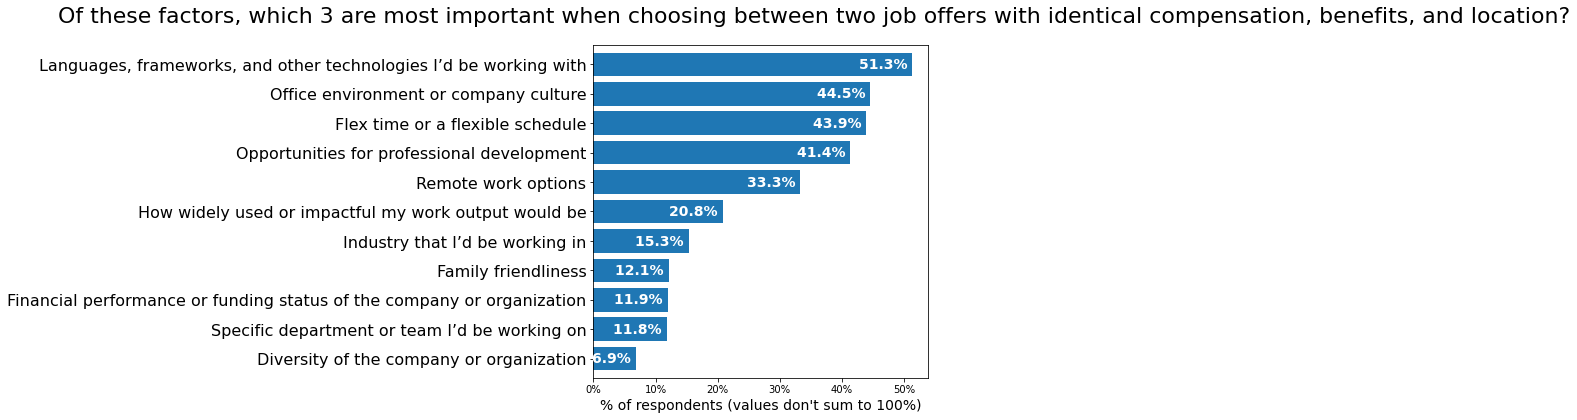

In [202]:
BARH_FIGURE_PARAMS = {'figsize': (6,6), 'dpi': 72}
plt.figure(**BARH_FIGURE_PARAMS)
ax = (job_factors_pool_counts / data.shape[0]).plot.barh(width=0.8)

plt.yticks(fontsize=16)
wrap_title = """Of these factors, which 3 are most important when choosing between two job offers with identical compensation, benefits, and location?"""

ax.set_title(wrap_title, fontdict={'fontsize':22}, loc='left', x=-1.6, y=1.05)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xlabel("% of respondents (values don't sum to 100%)", fontsize=14)
for i, option in enumerate(job_factors_pool_counts.index):
    x = job_factors_pool_counts[option] / data.shape[0]
    ax.annotate(text=f'{x*100:.1f}% ', xy=(x, i), va='center', ha='right', color='white', fontsize=14, weight='bold')

The initial question has been addressed: **Technology** emerges as the top priority for more than half of the respondents when considering a job offer. This isn't surprising, as most people prefer working in a field they're interested in or familiar with.

Following closely are office **environment/company culture and flexible schedule**, with a similar number of respondents also emphasizing opportunities for professional development as crucial factors. These four factors stand out as the most significant among the others.

Conversely, **only about 7% of respondents prioritize the diversity of the company or organization** when accepting a job offer.

 **Are there any patterns in respondents choises? Maybe some options used to be chosen together? Below there is a contingency table which will help finding answer.**

In [203]:
jobfactors_pool

Respondent                                         JobFactors
0                1  Languages, frameworks, and other technologies ...
1                1                                Remote work options
2                1         Opportunities for professional development
3                4                   Flex time or a flexible schedule
4                4              Office environment or company culture
...            ...                                                ...
144719       65629  Languages, frameworks, and other technologies ...
144720       65629                                Remote work options
144721       65630  Languages, frameworks, and other technologies ...
144722       65630                                Remote work options
144723       65630              Office environment or company culture

[144724 rows x 2 columns]

In [204]:
jobfactors_pool.reset_index(inplace=True)
jobfactors_pool.set_index('Respondent', inplace=True)

In [205]:

out = dict() 

for option in jobfactors_pool.JobFactors.unique():
    considered = jobfactors_pool.query('JobFactors == @option')
    corresponds = jobfactors_pool.query('JobFactors != @option')

    con_ind = set(considered.index)
    cor_ind = set(corresponds.index)
    
    common_ind = con_ind.intersection(cor_ind)
    
    out[option] = corresponds.loc[list(common_ind)].JobFactors.value_counts()

# Create a DataFrame from the dictionary and sort the index
df_out = pd.DataFrame.from_dict(out).sort_index()

# Remove rows and columns that are all zeros
df_out = df_out[df_out.index]

# Set the precision of the DataFrame
df_out = df_out.round(0)

# Apply a background gradient to visualize the counts
cm = sns.light_palette("green", as_cmap=True)
df_out.style.background_gradient(cmap=cm, axis=0)

This table provided doesn't fully answer our question because it only shows absolute values. It's clear that the most popular factors would likely be the second most popular choice for almost all options. I'm looking for more detailed relationships to answer questions like: What do respondents who prioritize "Diversity" commonly choose as their most important factor

In [206]:
job_factors_counts = pd.DataFrame(jobfactors_pool.JobFactors.value_counts(ascending=True))
counts = pd.concat([job_factors_counts for i in range(11)], axis=1).sort_index()
counts.columns = counts.index

In [207]:
FACTORS_SHORTNAMES = {
    'Diversity of the company or organization': 'Diversity', 
    'Family friendliness': 'Family friendliness',
    'Financial performance or funding status of the company or organization': 'Organization finances',
    'Flex time or a flexible schedule': 'Flex time',
    'How widely used or impactful my work output would be': 'Work impact',
    'Industry that I’d be working in': 'Industry',
    'Languages, frameworks, and other technologies I’d be working with': 'Tech stuff',
    'Office environment or company culture': 'Company culture and env.',
    'Opportunities for professional development': 'Professional development', 
    'Remote work options': 'Remote work',
    'Specific department or team I’d be working on':'Specific department'
}


rel_counts = (df_out / counts * 100)

# changing indexes and columns names:
rel_counts = rel_counts.reset_index()
rel_counts['JobFactors'].replace(FACTORS_SHORTNAMES, inplace=True)
rel_counts.set_index('JobFactors', inplace=True)
rel_counts.columns = [FACTORS_SHORTNAMES[col] for col in rel_counts.columns]

**Simplifying the factor names for ease of reference.**

In [208]:
# Apply background gradient and formatting
cm = sns.light_palette("green", as_cmap=True)
rel_counts_styled = rel_counts.style.background_gradient(cmap=cm, axis=0, text_color_threshold=0).format('{:.5f}')

# Display the styled DataFrame
display(rel_counts_styled)


This table shows the relationship between different job factors. Each cell represents the percentage of respondents who chose the factor listed in the row as their most important factor among those who also chose the factor listed in the column.

The cell at the intersection of **"Diversity" (row) and "Flex time" (column) shows that approximately 26% of respondents who prioritized "Diversity" also chose "Flex time" as their most important factor**.

A "nan" value indicates that there were no respondents who chose both factors, or that the calculation couldn't be made due to missing data.

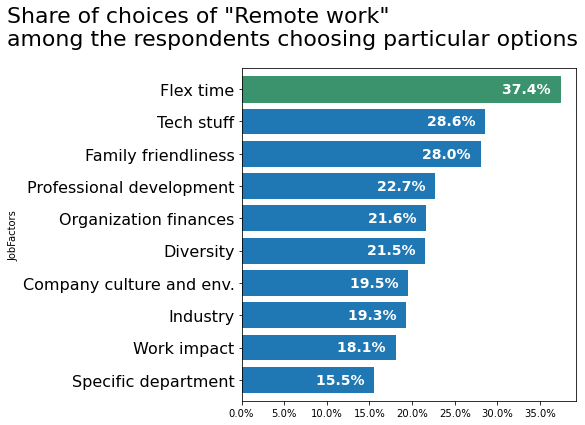

In [209]:
C_GREEN = '#3b936e'
annot_params = {'va': 'center', 'ha': 'right', 'color': 'white', 'fontsize': 14, 'weight': 'bold'}
 
def plot_option(option: str, hl: List[int]=None, hc: str=C_GREEN):
    if option not in rel_counts.columns:
        print(f"Column '{option}' not found in DataFrame.")
        return
    title = f'Share of choices of "{option}"\namong the respondents choosing particular options'
    option_data = rel_counts[option].dropna().sort_values()  # Drop NaN values before sorting
    plt.figure(**BARH_FIGURE_PARAMS)
    plt.yticks(fontsize=16)
    ax = option_data.plot.barh(width=0.8)
    ax.set_title(title, fontdict={'fontsize':22}, loc='left', x=-0.7, y=1.05)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(100))
    # Highlight the bars:
    if hl is not None and len(hl):
        for i in hl:
            ax.get_children()[i].set_color(hc)
    # Add annotations:
    for i, counter_option in enumerate(option_data.index):
        x = option_data[counter_option]
        ax.annotate(text=f'{x:.1f}%  ', xy=(x, i), **annot_params)
plot_option('Remote work', hl=[9])

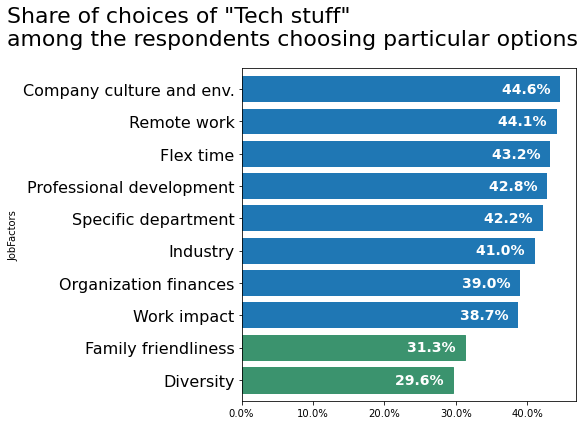

In [210]:
plot_option('Tech stuff', hl=[0,1])

**An Interesting observation** is that people who chose **"Industry" are less concerned about the Flexible Work Time and the family friendliness.**

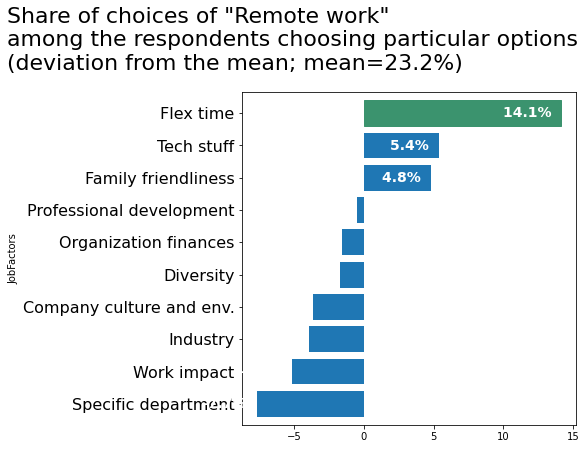

In [211]:
def plot_feature_mean_dev(option: str, hl: List[int]=None, hc: str=C_GREEN, standardize: bool=False):
    
 
    if option not in rel_counts.columns:
        print(f"Column '{option}' not found in DataFrame.")
        return
    mean = rel_counts[option].mean()
    mean_dev = rel_counts[option].dropna().sort_values() - mean
    title = f'Share of choices of "{option}"\namong the respondents choosing particular options\n(deviation from the mean; mean={mean:.1f}%)'
 
    if standardize:
        std_dev = rel_counts[option].std()
        mean_dev /= std_dev
        title = f'Share of choices of "{option}"\namong the respondents choosing particular options\n(deviation from the mean in standard deviations; mean={mean:.1f}%, std={std_dev:.1f}%)'
 
    plt.figure(**BARH_FIGURE_PARAMS)
    plt.yticks(fontsize=16)
    ax = mean_dev.plot.barh(width=0.8)
    ax.set_title(title, fontdict={'fontsize':22}, loc='left', x=-0.7, y=1.05)
    # Highlight the bars:
    if hl is not None and len(hl):
        for i in hl:
            ax.get_children()[i].set_color(hc)
    # Add annotations:
    for i, value in enumerate(mean_dev):
        ax.annotate(text=f'{value:.1f}%  ', xy=(value, i), **annot_params)
 
plot_feature_mean_dev('Remote work', hl=[9])


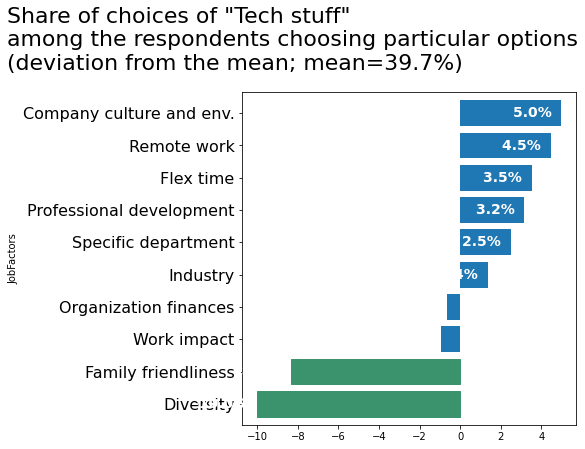

In [213]:
plot_feature_mean_dev('Tech stuff', hl=[0,1]);

- We have identified notable differences in the values from the charts.
- Comparing the maximum deviations (represented by green bars) between each other is crucial.
- A deviation of **17.1% appears more significant than 2.2%**, but this comparison depends on two simple features of the examined samples:
  - **Mean**
  - **Standard deviation**
  
  
  
<br />
<center>
<img src="./data/giphy-7.gif" width=400 />
</center>


  
  
  
- The means vary significantly among the above metrics.
- The size of the deviation of the means could be correlated with the mean.
- We can easily **verify** this through three different methods:
  - **Scatter plot**
  - **Pearson's Correlation Coefficient**
  - **Spearman's Correlation Coefficient**
- These calculations involve means from each option and their standard deviations.


### Scatter Plot (Mean Vs Standard Deviation)

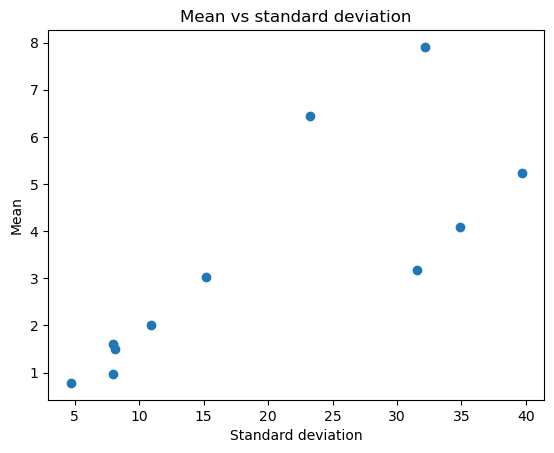

In [216]:
numeric_columns = rel_counts.select_dtypes(include=[np.number]).columns
means = rel_counts[numeric_columns].mean(axis=0)
stds = rel_counts[numeric_columns].std(axis=0)
 
plt.scatter(means, stds)
plt.xlabel('Standard deviation')
plt.ylabel('Mean')
plt.title('Mean vs standard deviation');

The above plot shows there is a relationship between Mean and Standard Deviation .We will further try to confirm by applying the **Pearson's Correlation Coefficient and Spearman's Correlation Coefficient.**

### Pearson's Correlation Coefficient and Spearman's Correlation Coefficient.

In [217]:
pc, pc_pval = pearsonr(stds, means)
sc, sc_pval = spearmanr(stds, means)

print('COEF TYPE\tcoef\tp-value')
print(f'PEARSON:\t{pc:.2f}\t{pc_pval:.4f}\nSPEARMANN:\t{sc:.2f}\t{sc_pval:.4f}')

COEF TYPE	coef	p-value
PEARSON:	0.78	0.0048
SPEARMANN:	0.87	0.0005


Both monotonic and linear coefficients told us there is a correlation.
 
In order to be able to compare the results between options samples, let's standardize them using following formula:
 
$$\large z_{ij} = \frac{x_{ij} - \overline{x_j}}{s_j}$$
 
Where:
 
$x_{ij}$ - share of $j$ factor choices among $i$ group of respondents
 
$\overline{x_j}$ - average share of $j$ factor choices
 
$s$ - standard deviation of share of $j$ factor choices

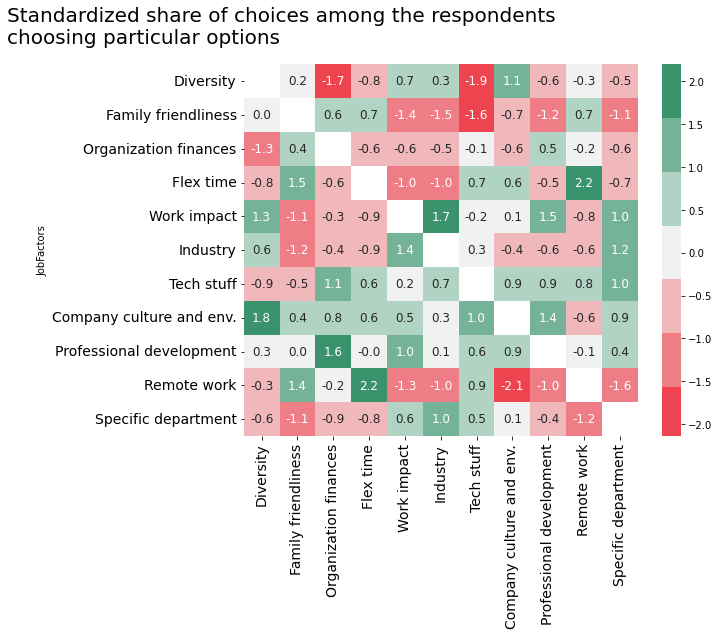

In [218]:
standardized = (rel_counts - means) / stds # standardization

# Heatmap of standardized values:
cm = sns.diverging_palette(10, 150, s=80, l=55, n=7)
plt.figure(figsize=(10,9), dpi=72)
ax = sns.heatmap(standardized, cmap=cm, center=0, annot=True,fmt='.1f', annot_kws={'fontsize':12})
ax.tick_params(axis='both', which='major', labelsize=14)
plt.title('Standardized share of choices among the respondents\nchoosing particular options', fontsize=20, loc='left', x=-0.6, y=1.04)
plt.tight_layout();

We're now able to identify which choices stand out from the average, which is set at 0. For example, when looking at people who selected 'Remote work options,' those who also chose 'Company culture' stand out the most from the average by a value of -2.1 on the heatmap.

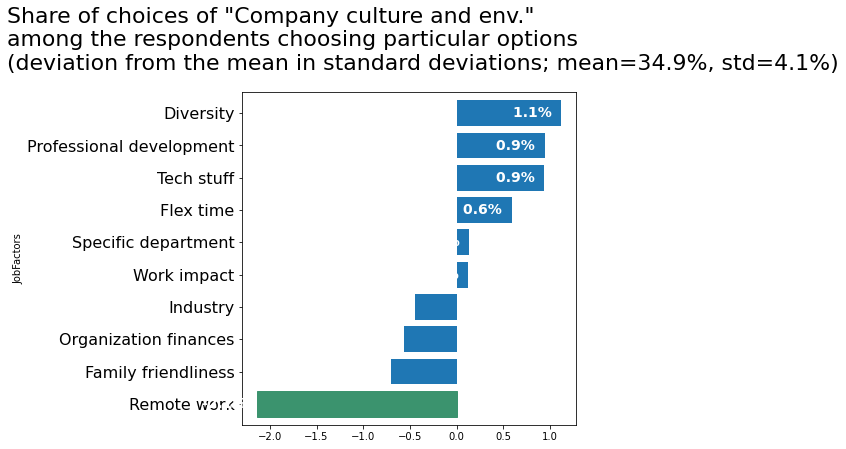

In [219]:
plot_feature_mean_dev('Company culture and env.', hl=[0], standardize=True);

We can see that if someone picks 'Remote work options,' they're less likely to prioritize 'Company culture' compared to others.

**We can illustrate these significant connections using a graph.**

In [220]:
standardized.sample(2)

Diversity  Family friendliness  \
JobFactors                                                 
Company culture and env.   1.793585             0.427521   
Family friendliness        0.034734                  NaN   

                          Organization finances  Flex time  Work impact  \
JobFactors                                                                
Company culture and env.               0.764667   0.579989     0.461106   
Family friendliness                    0.590321   0.652907    -1.392190   

                          Industry  Tech stuff  Company culture and env.  \
JobFactors                                                                 
Company culture and env.  0.252325    0.950038                       NaN   
Family friendliness      -1.494609   -1.593828                 -0.706795   

                          Professional development  Remote work  \
JobFactors                                                        
Company culture and env.                  1.400569    -0.573867   
Family friendliness                      -1.249317     0.745497   

                          Specific department  
JobFactors                                     
Company culture and env.             0.852049  
Family friendliness                 -1.084503

/var/folders/51/nlbf19z54pn48lrft00tz1600000gn/T/ipykernel_69624/4114802213.py:15: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.gcf().subplots_adjust(right=1)


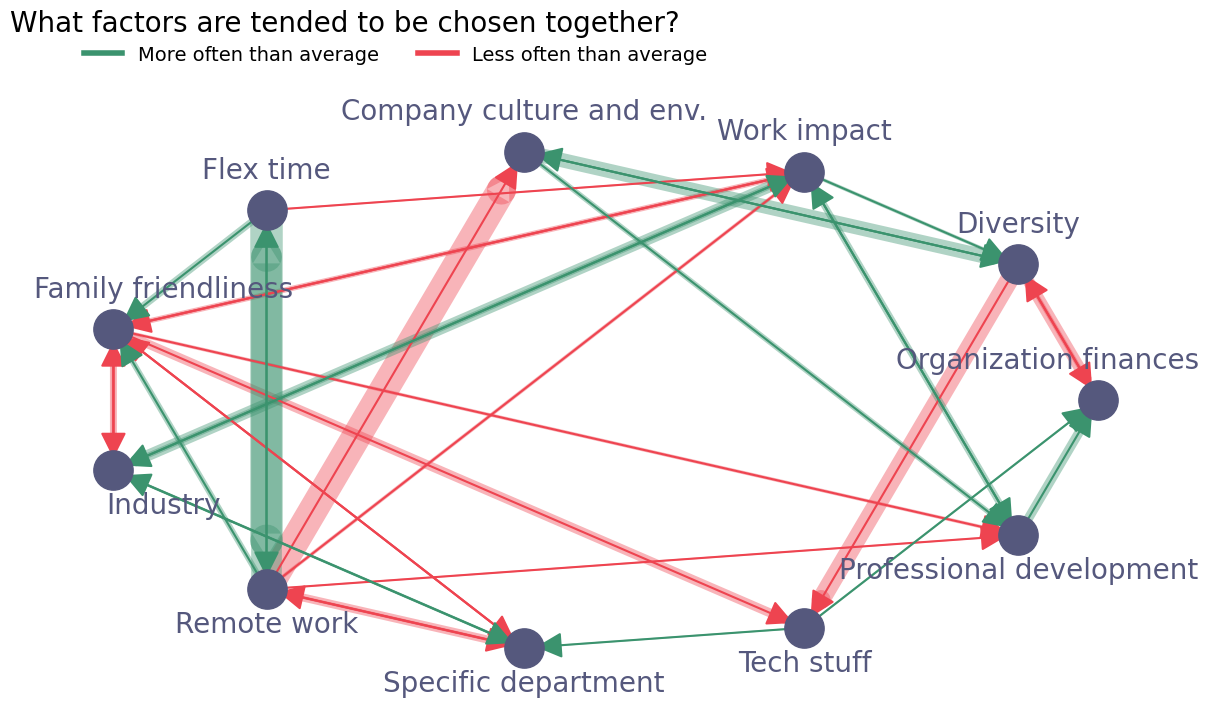

In [221]:
# Graphs
# networkx requires special data structure like:
# (X_node, Y_node, weight)
# Nodes are the indexes/columns names, weight is an absolute, standardized value.
# That's why I need to melt dataset as well as remove nans:
C_RED = '#ee4450'
standardized_melted = standardized.reset_index().melt('JobFactors').dropna() 

# Let's keep only edges of over standard deviation weight:
standardized_melted = standardized_melted.query('value > 1 | value < -1').reset_index(drop=True)
standardized_melted['abs_value'] = standardized_melted['value'].apply(abs)

# Create figure and multi directed graph (to keep two sided relations)
plt.figure(figsize=(12,7), constrained_layout=True)
plt.gcf().subplots_adjust(right=1)
job_factors_graph = nx.from_pandas_edgelist(standardized_melted, 
                                            source='JobFactors', 
                                            target='variable', 
                                            edge_attr=['value','abs_value'], 
                                            create_using=nx.MultiDiGraph,
                                            edge_key='abs_value')

# I would like to assign a color to distinguish negative and positive standardized values:
positive_edges = []
positive_values = []

negative_edges = []
negative_values = []

colors = []
node_labels = {}

for (u, v, attrib_dict) in list(job_factors_graph.edges.data()):
    node_labels[u] = u
    
    if attrib_dict['value'] < 0:
        c = 'r'
        negative_edges.append((u,v))
        negative_values.append(attrib_dict['abs_value'])
    else:
        c = 'g'
        positive_edges.append((u,v))
        positive_values.append(attrib_dict['abs_value'])
    colors.append(c)
    
# Apply circular layout and obtain the coordinates in order to manipulate label locations:
pos = nx.circular_layout(job_factors_graph)
node_options = {"node_size": 800}
nx.draw_networkx_nodes(job_factors_graph, pos,  node_color="#55587d", **node_options)

edge_draw_options = {
    'G': job_factors_graph,
    'pos': pos,
    'alpha': 0.4,
    'arrowsize': 0.1
}

edge_draw_options_2 = {
    'G': job_factors_graph,
    'pos': pos,
    'arrowsize': 40,
    'width': 1.5
}

POWER = 4

nx.draw_networkx_edges(
    edgelist=negative_edges,
    width=np.power(negative_values, POWER),
    edge_color=C_RED,
    **edge_draw_options
)

nx.draw_networkx_edges(
    edgelist=positive_edges,
    width=np.power(positive_values, POWER),
    edge_color=C_GREEN,
    **edge_draw_options
)

nx.draw_networkx_edges(edgelist=negative_edges, edge_color=C_RED, **edge_draw_options_2)
nx.draw_networkx_edges(edgelist=positive_edges, edge_color=C_GREEN, **edge_draw_options_2)

pos_higher = {}

for k, v in pos.items():
    if v[1] > 0:
        y = v[1] + 0.16
    else:
        y = v[1] - 0.14
    
    if v[0] > 0.90:
        x = v[0] - 0.1
    elif v[0] < -0.9:
        x = v[0] + 0.1
    else:
        x = v[0]
    pos_higher[k] = (x, y)
        
nx.draw_networkx_labels(job_factors_graph, pos_higher, node_labels, font_size=20, font_color='#55587d')
plt.axis("off")

plt.title('What factors are tended to be chosen together?', fontsize=20, y=1.1, loc='left')
custom_lines = [Line2D([0], [0], color=C_GREEN, lw=4),
                Line2D([0], [0], color=C_RED, lw=4)]

plt.legend(custom_lines, 
           ['More often than average', 'Less often than average'], 
           bbox_to_anchor=(0.0,0.56,0.6,0.56), 
           frameon=False, 
           fontsize=14, 
           ncol=2)

plt.show();


### Here we answer the first major question that we asked in the begining of this analysis

Only relationships beyond the standard deviation are considered. 
**Here are the key insights:**

1. People prioritizing 'Family friendliness' are less concerned about career factors like 'Specific department', 'Tech stuff', 'Professional development', and 'Industry'.
2. Conversely, those valuing 'Work impact' are more likely to prioritize 'Industry' or 'Professional development'.
3. 'Diversity' advocates prioritize 'Company culture' and 'Office environment' over 'Organization finance' and 'Tech stuff', reflecting common corporate values.
4. 'Flex time' and 'Remote work options' tend to overlap, suggesting a preference for convenience. Both groups prioritize 'Family friendliness' but are less concerned about 'Work impact'.


<br />
<center>
<img src="./data/giphy-8.webp" width=400 />
</center>


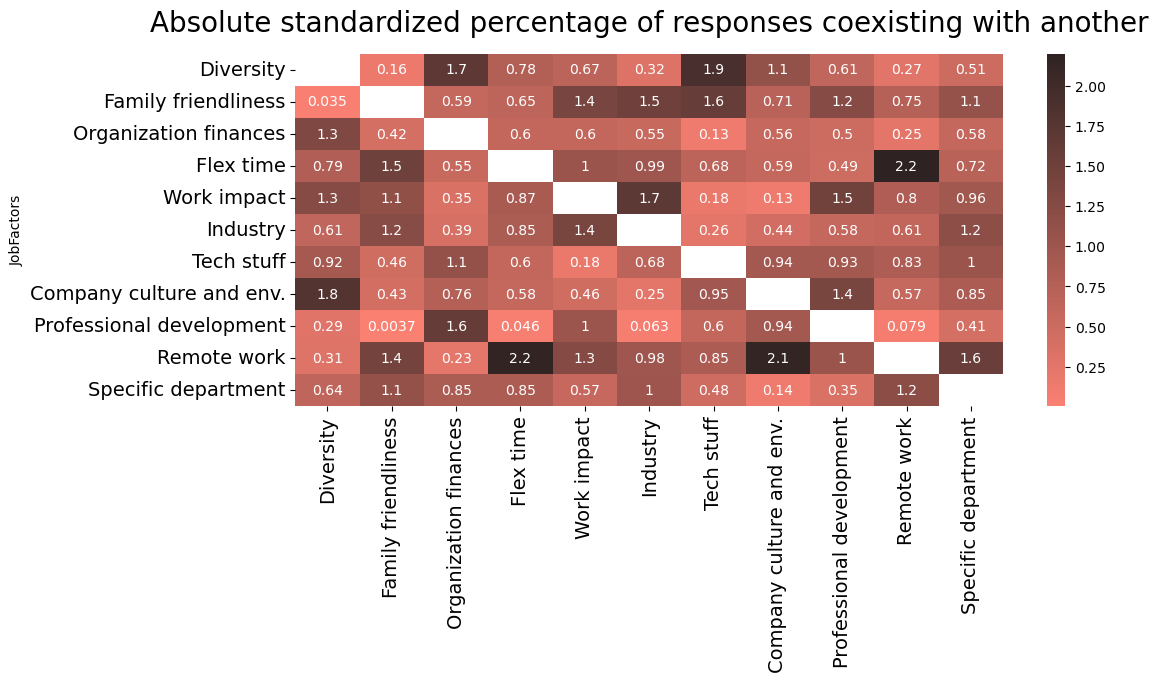

In [222]:
standardized_abs = abs(standardized)
cm = sns.color_palette("dark:salmon_r", as_cmap=True)
plt.figure(figsize=(12,7))
ax = sns.heatmap(standardized_abs, cmap=cm, annot=True)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.title('Absolute standardized percentage of responses coexisting with another', fontsize=20, x=0.5, y=1.04)
plt.tight_layout();

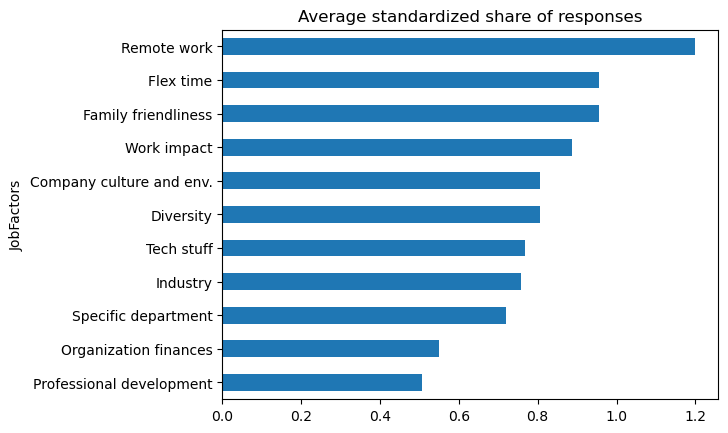

In [223]:
standardized_abs.mean(axis=1).sort_values().plot.barh(title='Average standardized share of responses');

We've found that `Remote work options` deviates the most from the global average.

### Here we answer the question patterns in respondents choices

### Let us move to the last question of our analysis

## What impact respondents' choices?

To understand the factors influencing these choices, we'll use decision tree-based algorithms. They're preferable to logistic regression for their performance and interpretability.

Among these algorithms, options like Random Forest, XGBoost, Light GBM, and Cat Boost are popular. Since we're dealing with categorical features, XGBoost is a suitable choice.

Now, let's prepare the dataset by combining the 'jobfactors_pool' and 'data' dataframes.

In [224]:
jobfactors_pool.sample(2)

index                                         JobFactors
Respondent                                                          
31043       81904                   Flex time or a flexible schedule
2133         5678  Languages, frameworks, and other technologies ...

In [225]:
data.sample()

Respondent                      MainBranch Hobbyist   Age Age1stCode  \
32535       32655  I am a developer by profession      Yes  43.0          7   

      CompFreq  CompTotal  ConvertedComp Country   CurrencyDesc  ...  \
32535   Yearly    62000.0        67021.0  France  European Euro  ...   

      SurveyEase           SurveyLength Trans  \
32535       Easy  Appropriate in length    No   

                                          UndergradMajor  \
32535  Another engineering discipline (such as civil,...   

      WebframeDesireNextYear             WebframeWorkedWith  \
32535          Django;Vue.js  Django;jQuery;React.js;Vue.js   

                                 WelcomeChange WorkWeekHrs YearsCode  \
32535  Just as welcome now as I felt last year        50.0        30   

      YearsCodePro  
32535           20  

[1 rows x 61 columns]

In [226]:
data.set_index('Respondent', inplace=True)
data.drop('JobFactors', axis=1, inplace=True)
jf_dataset = jobfactors_pool.merge(data, how='left', on='Respondent')

In [227]:
jf_dataset.sample()

index                                  JobFactors  \
Respondent                                                       
63322       143724  Opportunities for professional development   

                                                   MainBranch Hobbyist  Age  \
Respondent                                                                    
63322       I am not primarily a developer, but I write co...      Yes  NaN   

           Age1stCode CompFreq  CompTotal  ConvertedComp        Country  ...  \
Respondent                                                               ...   
63322              12   Yearly   190000.0       190000.0  United States  ...   

           SurveyEase SurveyLength Trans  \
Respondent                                 
63322             NaN          NaN   NaN   

                                               UndergradMajor  \
Respondent                                                      
63322       Information systems, information technology, o...   

           WebframeDesireNextYear WebframeWorkedWith WelcomeChange  \
Respondent                                                           
63322                      Vue.js       Flask;Vue.js           NaN   

           WorkWeekHrs YearsCode YearsCodePro  
Respondent                                     
63322             50.0        27           25  

[1 rows x 61 columns]

Now that we've assigned job factors to each respondent's data, it's time to clean and prepare the dataset for modeling.

We'll start by adding continent information to the dataset, treating it as an additional feature.

In [228]:
countries = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')
countries.replace('US', 'United States', inplace=True)
countries.replace('CZ', 'Czech Republic', inplace=True)
countries.replace('Congo, Democratic Republic of', 'Congo, Republic of the...', inplace=True)

countries[countries['Country'].str.startswith('Congo')]

Continent                    Country
11    Africa                      Congo
12    Africa  Congo, Republic of the...

In [229]:
jf_dataset = jf_dataset.reset_index().merge(countries, how='left', on='Country').set_index('Respondent')
jf_dataset[jf_dataset.Continent.isna()]['Country'].unique()

array(['Taiwan', 'Venezuela, Bolivarian Republic of...', 'Viet Nam',
       'Syrian Arab Republic', 'Nomadic', 'Republic of Moldova',
       'Isle of Man', 'Hong Kong (S.A.R.)', 'Republic of Korea',
       'United Republic of Tanzania', 'South Korea', 'Myanmar',
       'Democratic Republic of the Congo',
       'The former Yugoslav Republic of Macedonia', 'Kosovo',
       'Libyan Arab Jamahiriya', 'Burkina Faso', "Côte d'Ivoire",
       "Lao People's Democratic Republic", 'Brunei Darussalam',
       'Timor-Leste'], dtype=object)

Some countries are missing continent information, leading to inconsistent data. For now, let's proceed without it. We'll focus on cleaning and simplifying the dataset.

In [230]:
# Some continueas features contains non-continues values like strings:
cont_mapping_dict = {
    'YearsCode': {
        'Less than 1 year': 0,
        'More than 50 years': 51
    },
    'Age1stCode':{
        'Younger than 5 years': 4,
        'Older than 85': 86
    }
}

# Abbreviations would make it easier to print and read many feature names.
categ_mapping_dict = {
    'Employment': {
        'Employed full-time': 'EFT',
        'Student': 'ST',
        'Independent contractor, freelancer, or self-employed': 'F',
        'Not employed, but looking for work': 'NE',
        'Employed part-time': 'EPT'    
    },
    'MainBranch': {
        'I am a developer by profession': 'DEV',
        'I am a student who is learning to code': 'ST',
        'I am not primarily a developer, but I write code sometimes as part of my work': 'NDEV'
    },
    'Hobbyist': { 'Yes': 1, 'No': 0 },
    'EdLevel': {
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'BCH',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'MS',
        'Some college/university study without earning a degree': 'ND',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'SS',
        'Associate degree (A.A., A.S., etc.)': 'AD',
        'Other doctoral degree (Ph.D., Ed.D., etc.)': 'PHD',
        'Professional degree (JD, MD, etc.)': 'PD',
        'Primary/elementary school': 'O',
        'I never completed any formal education': 'O'
    },
    'JobSat': {
        'Very satisfied': 'VS',
        'Slightly satisfied': 'SS',
        'Slightly dissatisfied': 'SD',
        'Very dissatisfied': 'VD',
        'Neither satisfied nor dissatisfied': 'NEUTRAL'
    },
    'JobFactors': {
        'Languages, frameworks, and other technologies I’d be working with': 'LANG',
        'Office environment or company culture': 'CULTURE',
        'Flex time or a flexible schedule': 'FLEX',
        'Opportunities for professional development': 'DEV',
        'Remote work options': 'REMOTE',
        'How widely used or impactful my work output would be': 'IMPACT',
        'Industry that I’d be working in': 'IND',
        'Family friendliness': 'FAMILY',
        'Financial performance or funding status of the company or organization': 'COMP_FIN',
        'Specific department or team I’d be working on': 'TEAM',
        'Diversity of the company or organization': 'DIVERSITY'
    },
    
    # Since there are really little number of respondents of given Genders and Sexualities, 
    # I decided to simplify the data. 
    'Gender': {
        'Non-binary, genderqueer, or gender non-conforming': 'OTHER',
        'Man;Non-binary, genderqueer, or gender non-conforming': 'OTHER',
        'Woman;Non-binary, genderqueer, or gender non-conforming': 'OTHER',
        'Woman;Man': 'OTHER',
        'Woman;Man;Non-binary, genderqueer, or gender non-conforming': 'OTHER'
    },
    'Sexuality': {
        'Straight / Heterosexual': 'HETERO',
        'Bisexual': 'BI',
        'Gay or Lesbian': 'GL',
        'Queer': 'OTHER',
        'Bisexual;Straight / Heterosexual' : 'OTHER', 
        'Bisexual;Queer': 'OTHER',
        'Gay or Lesbian;Queer': 'OTHER',
        'Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer': 'OTHER',
        'Bisexual;Straight / Heterosexual;Queer': 'OTHER',
        'Straight / Heterosexual;Queer': 'OTHER',
        'Bisexual;Gay or Lesbian;Straight / Heterosexual': 'OTHER',
        'Gay or Lesbian;Straight / Heterosexual': 'OTHER',
        'Bisexual;Gay or Lesbian': 'OTHER', 
        'Bisexual;Gay or Lesbian;Queer': 'OTHER'
    },
    'JobSeek': {
       'I am not interested in new job opportunities': 'NOT',
       'I’m not actively looking, but I am open to new opportunities': 'OPEN',
       'I am actively looking for a job': 'YES'
    },
    'NEWOvertime': {
        'Often: 1-2 days per week or more': 'OFTEN',
        'Occasionally: 1-2 days per quarter but less than monthly':'OCCASION',
        'Never': 'NEVER',
        'Rarely: 1-2 days per year or less': 'RARELY',
        'Sometimes: 1-2 days per month but less than weekly': 'SOMETIMES'
    }
}

# These features aren't processed yet.
not_processed = ['Age', 'ConvertedComp', 'Continent', 'Country', 'OrgSize']

features = list(categ_mapping_dict.keys()) + list(cont_mapping_dict.keys()) + not_processed

In [231]:
dataset = jf_dataset.replace(cont_mapping_dict).replace(categ_mapping_dict)[features]
X = dataset.drop('JobFactors', axis=1).reset_index().drop_duplicates().set_index('Respondent')

In [232]:
# Decision trees are able to highlight the nan values as well as identify what is the replacement for those.
# That's why I decided to replace nans by -1. 
# Another approaches requires testing which choice would result in better modelling output.
X['YearsCode'] = X['YearsCode'].fillna(-1).astype(int)
X['Age1stCode'] = X['Age1stCode'].fillna(-1).astype(int)
X['Hobbyist'] = X['Hobbyist'].fillna(-1).astype(int)

X[X.select_dtypes('object').columns] = X[X.select_dtypes('object').columns].fillna('nan')

# Age:
X['Age'].fillna(value=X['YearsCode']+X['Age1stCode'], inplace=True)
X.loc[ X['Age'] < 0, 'Age'] = -1
X['Age'] = X['Age'].astype(int)

# Compensation:
X['ConvertedComp'] = X['ConvertedComp'].fillna(-1).astype(int)

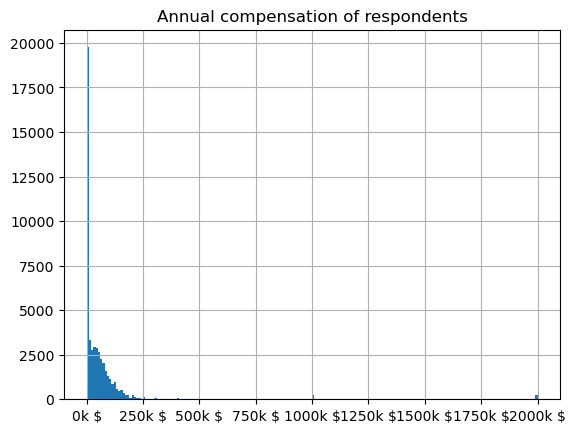

In [233]:
ax = X['ConvertedComp'].hist(bins=200)
ticks = ticker.FuncFormatter(lambda x, pos: '{0:.0f}k $'.format(x/1000))
ax.xaxis.set_major_formatter(ticks)
ax.set_title('Annual compensation of respondents');

In [234]:
cat_features_indices = list(X.select_dtypes('object'))
cat_features_indices

['Employment',
 'MainBranch',
 'EdLevel',
 'JobSat',
 'Gender',
 'Sexuality',
 'JobSeek',
 'NEWOvertime',
 'Continent',
 'Country',
 'OrgSize']

Each JobFactor is treated as an individual target. This isn't a multiclassification problem due to overlapping classes. Thus, it's more effective to treat each class separately and create a model for each.

In [235]:
target_dummies = pd.get_dummies(dataset['JobFactors'])
target_dummies = target_dummies.reset_index().groupby('Respondent').max()
target_dummies.head(2)

COMP_FIN  CULTURE   DEV  DIVERSITY  FAMILY   FLEX  IMPACT    IND  \
Respondent                                                                     
1              False    False  True      False   False  False   False  False   
4              False     True  True      False   False   True   False  False   

             LANG  REMOTE   TEAM  
Respondent                        
1            True    True  False  
4           False   False  False

# Data Modelling

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its efficiency and effectiveness in handling structured/tabular data, which seems to be the case for the job factors dataset being analyzed here.
 
Here's why XGBoost might be chosen for this model:
 
**Performance:** XGBoost is highly efficient and effective for structured/tabular data.
 
**Accuracy:** It produces accurate models by combining weak learners (decision trees).
 
**Robustness:** Handles outliers and missing values well.
 
**Feature Importance:** Provides insights into influential factors.
 
**Speed:** Computationally efficient, suitable for large datasets.

In [236]:
fitargs = {
    'verbose': 0,
    'early_stopping_rounds': 1500,
    'eval_metric': ['map', 'aucpr'] # aucpr works better with unbalanced classess
    
}

modelargs = {
    'booster': 'gbtree',
    'n_estimators': 7000,
    'learning_rate': 0.02,
    'max_depth': 8,
    'verbosity': 1,
    'subsample': 0.8,
    'subsample_bytree': 0.6
}

def train_and_predict_xgb(X: pd.DataFrame, target: str, modelargs: dict = None, fitargs: dict = None,
                         drop_columns_threshold_values=100) -> dict:
    """Train and evaluate XGBoost model for passed dataset and target feature name.
    
    Parameters:
    X - pd.DataFrame containing processed data set
    target - str, target feature name that matches 'target_dummies[target]'
    modelargs - dict, parameters of 'xgb.XGBClassifier()''
    fitargs - dict, parameters of xgboost model '.fit()' method
    
    returns a dictionary containing: following keys:
        - model
        - X_train
        - X_test
        - y_train
        - y_test
        - y_train_pred
        - y_test_pred
        - acc_test
        - acc_train
    """
    
    print(f'MODELLING:\t{target}')
    xgb_X = pd.get_dummies(X)
    xgb_X = xgb_X.drop(xgb_X.loc[:, xgb_X.sum() < drop_columns_threshold_values].columns, axis=1)
    
    y = target_dummies[[target]]
    X_train, X_test, y_train, y_test = train_test_split(xgb_X, y, test_size=0.3)
    print(f'The shape of the training set: {X_train.shape}')
    xgb_model = xgb.XGBClassifier(**modelargs)
    
    # train the model
    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], **fitargs)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    print('Accuracy train\n:', acc_train)
    print('Accuracy test\n:', acc_test)
    
    results = dict()
    results['model'] = xgb_model
    results['X_train'] = X_train
    results['X_test'] = X_test
    results['y_train'] = y_train
    results['y_test'] = y_test
    results['y_train_pred'] = y_train_pred
    results['y_test_pred'] = y_test_pred
    results['acc_test'] = acc_test
    results['acc_train'] = acc_train
    
    return results

In [237]:
models = dict()
for target in tqdm(target_dummies.columns, desc='Training process'):
    models[target] = train_and_predict_xgb(X, target, modelargs, fitargs)

Training process:   0%|          | 0/11 [00:00<?, ?it/s]

MODELLING:	COMP_FIN
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.8823239925891616
Accuracy test
: 0.8765957446808511
MODELLING:	CULTURE
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:41:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.6533985641500695
Accuracy test
: 0.5766970618034448
MODELLING:	DEV
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.6629515979620194
Accuracy test
: 0.6034447821681864
MODELLING:	DIVERSITY
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.9342577582213988
Accuracy test
: 0.932387706855792
MODELLING:	FAMILY
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.8776922186197313
Accuracy test
: 0.8824045930428909
MODELLING:	FLEX
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:43:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.6485930986567855
Accuracy test
: 0.5746031746031746
MODELLING:	IMPACT
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:44:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.7988362667901806
Accuracy test
: 0.7928402566700439
MODELLING:	IND
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.8475856878184345
Accuracy test
: 0.8449848024316109
MODELLING:	LANG
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:45:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.6306739231125521
Accuracy test
: 0.5782505910165484
MODELLING:	REMOTE
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:45:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.7330940250115794
Accuracy test
: 0.6828098615332658
MODELLING:	TEAM
The shape of the training set: (34544, 124)


/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/kaviprakashramalingam/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:46:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "subsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy train
: 0.8827582213987958
Accuracy test
: 0.8830124957784532


# Model Evaluation

In [238]:
models.keys()

dict_keys(['COMP_FIN', 'CULTURE', 'DEV', 'DIVERSITY', 'FAMILY', 'FLEX', 'IMPACT', 'IND', 'LANG', 'REMOTE', 'TEAM'])

In [239]:
print(f"TARGET     \tacc_train\tacc_test")
for key, val in models.items():
    print(f"{key}     \t{val['acc_train']:.2f}\t        {val['acc_test']:.2f}")

TARGET     	acc_train	acc_test
COMP_FIN     	0.88	        0.88
CULTURE     	0.65	        0.58
DEV     	0.66	        0.60
DIVERSITY     	0.93	        0.93
FAMILY     	0.88	        0.88
FLEX     	0.65	        0.57
IMPACT     	0.80	        0.79
IND     	0.85	        0.84
LANG     	0.63	        0.58
REMOTE     	0.73	        0.68
TEAM     	0.88	        0.88


The accuracy scores indicate decent model performance. For instance, in the Diversity case, we see an accuracy of over 94% on the training set, which appears impressive.

However, it's crucial to approach these results with skepticism. Accuracy isn't the ideal metric for imbalanced classification tasks. Just comparing the count of 'True' labels with the model's accuracy reveals a strong correlation.

In [240]:
acc = []
for key, val in models.items():
    acc.append([key, val['acc_train'], val['acc_test']])
    
cnts = []
for key, val in models.items():
    cnts.append([key, val['y_train'].sum()[0], val['y_test'].sum()[0]])

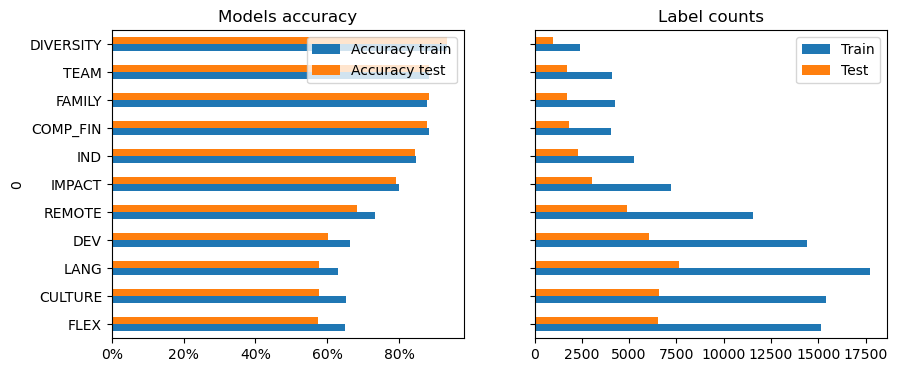

In [241]:
models_accuracy = pd.DataFrame(acc).set_index(0).rename(columns={1: 'Accuracy train', 2: 'Accuracy test'}).sort_values('Accuracy test')
label_counts = pd.DataFrame(cnts).set_index(0).rename(columns={1: 'Train', 2: 'Test'}).reindex(index=models_accuracy.index)

fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)

models_accuracy.plot.barh(title='Models accuracy', ax=ax[0])
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1))
label_counts.plot.barh(title='Label counts', ax=ax[1]);

The accuracy score has a notable drawback—it favors imbalanced classes, evident in the graphs.

To address this issue, we can utilize specific metrics like recall score (True Positive Rate, TPR) and precision (Positive Predictive Value, PPV):

$$ACC = \frac{tp + tn}{tp + tn + fp + fn}$$

$$TPR = \frac{tp}{tp+fn}$$

$$PPV = \frac{tp}{tp+fp}$$

Where:
* tp - True Positive
* fn - False Negative
* fp - False Positive
* tn - True Negative


In [242]:
df_models = pd.DataFrame(models)
df_models = df_models.T

In [243]:
df_models['recall_test'] = df_models.apply(lambda row: recall_score(row['y_test'], row['y_test_pred']), axis=1)
df_models['recall_train'] = df_models.apply(lambda row: recall_score(row['y_train'], row['y_train_pred']), axis=1)

df_models['precision_test'] = df_models.apply(lambda row: precision_score(row['y_test'], row['y_test_pred']), axis=1)
df_models['precision_train'] = df_models.apply(lambda row: precision_score(row['y_train'], row['y_train_pred']), axis=1)

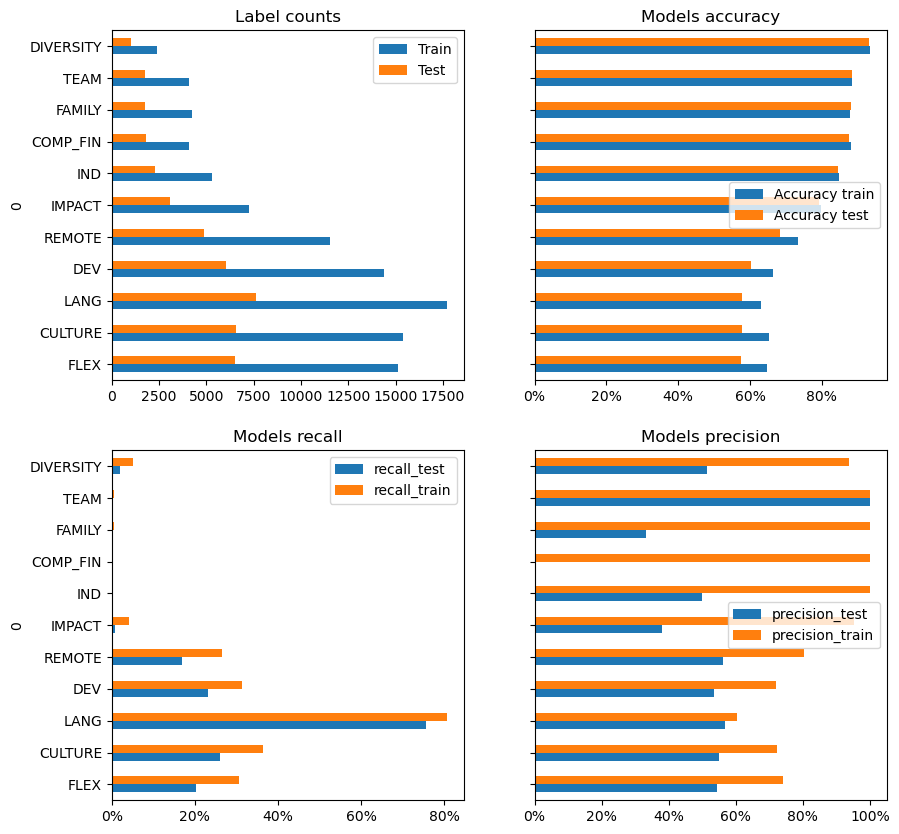

In [244]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)

label_counts.plot.barh(title='Label counts', ax=ax[0,0])
models_accuracy.plot.barh(title='Models accuracy', ax=ax[0,1])

df_models[['recall_test', 'recall_train']].reindex(index=models_accuracy.index).plot.barh(title='Models recall', ax=ax[1,0])
df_models[['precision_test', 'precision_train']].reindex(index=models_accuracy.index).plot.barh(title='Models precision', ax=ax[1,1])
ax[0,1].xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax[1,0].xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(1))

Now we can definitely say the predictable power of these models is poor. They are overfitted. It seems like the last model, despite to poor accuracy, is least overfitted, having similar precision and recall in both train and test set.

Nonetheless, we can use these models as explainers of what impacts of respondents decisions. To do that we are going to use SHAP (SHapley Additive exPlanation) Values 

# Interesting things about SHAPley
 
## Invention of SHAP
 
SHAP (SHapley Additive exPlanations) was introduced as a unified framework for interpreting predictions of complex machine learning models. It was developed to address the challenge of understanding why such models make specific predictions, especially when they are highly accurate but lack interpretability. The framework assigns an importance value to each feature for a particular prediction, allowing users to gain insights into the model's decision-making process.
 
## Usages
 
The name "SHAP" is derived from the concept of "Shapley values" in cooperative game theory, which were introduced by Lloyd Shapley in the 1950s. Shapley values provide a way to fairly distribute the payoff of a coalition among its members. In the context of SHAP, the framework uses a variation of Shapley values to assign importance to each feature in a prediction. The name "SHAP" was chosen to reflect this connection to cooperative game theory and the concept of fairness in distributing importance among features.

*During World War II, game theory principles, including Shapley values, influenced strategic resource allocation decisions by the U.S. military, optimizing efficiency and fairness in distribution.*
 
Overall, SHAP provides a valuable tool for improving the transparency and trustworthiness of machine learning models, making them more accessible to users and stakeholders who require interpretability.


In [245]:
shap.initjs()
def explain_feature(feature):
    explainer = shap.TreeExplainer(df_models.loc[feature]['model'])
    
    shap_values_X_train = explainer.shap_values(df_models.loc[feature]['X_train'])
    shap.summary_plot(shap_values_X_train, df_models.loc[feature]['X_train'], feature_names=df_models.loc[feature]['X_train'].columns)
    
    shap_values_X_test = explainer.shap_values(df_models.loc[feature]['X_test'])
    shap.summary_plot(shap_values_X_test, df_models.loc[feature]['X_test'], feature_names=df_models.loc[feature]['X_test'].columns)
    
    return explainer, shap_values_X_train, shap_values_X_test

COMP_FIN


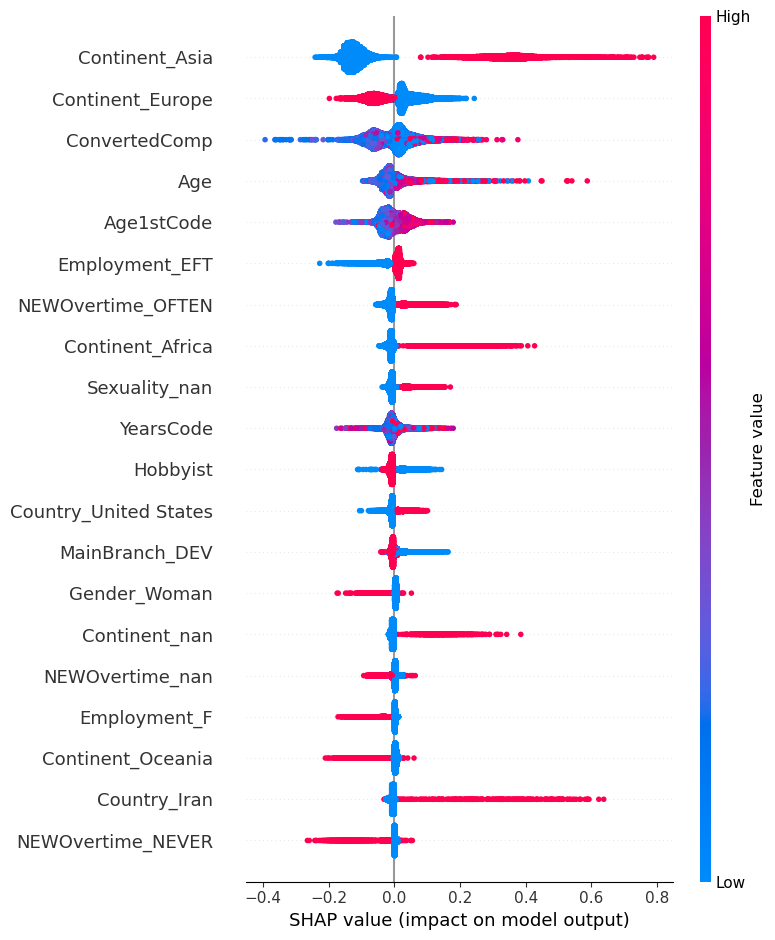

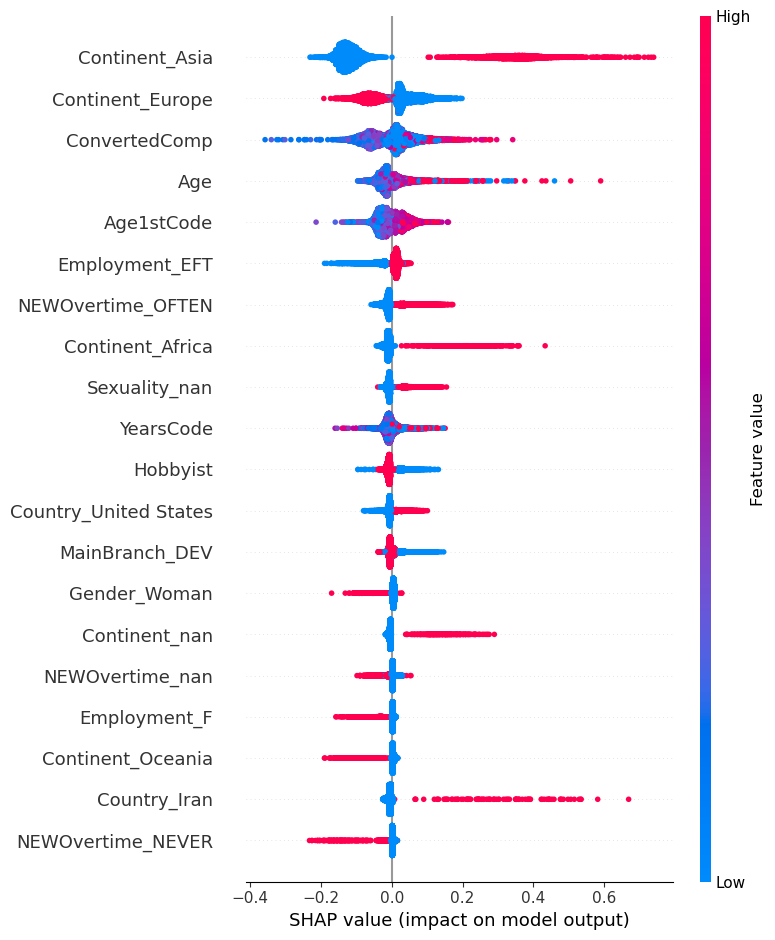

CULTURE


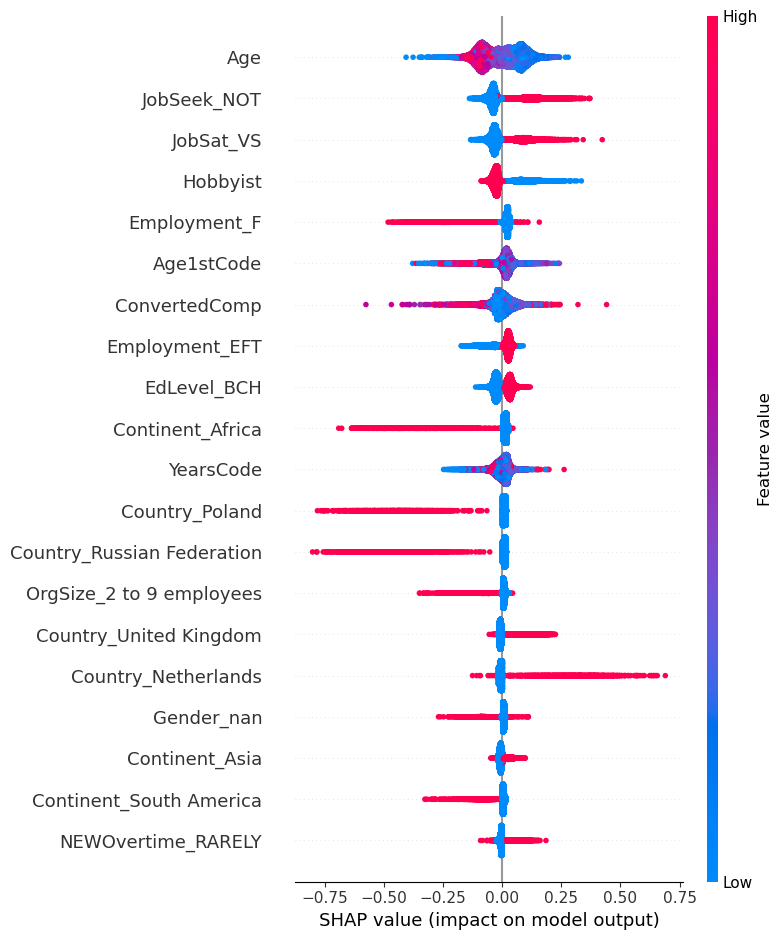

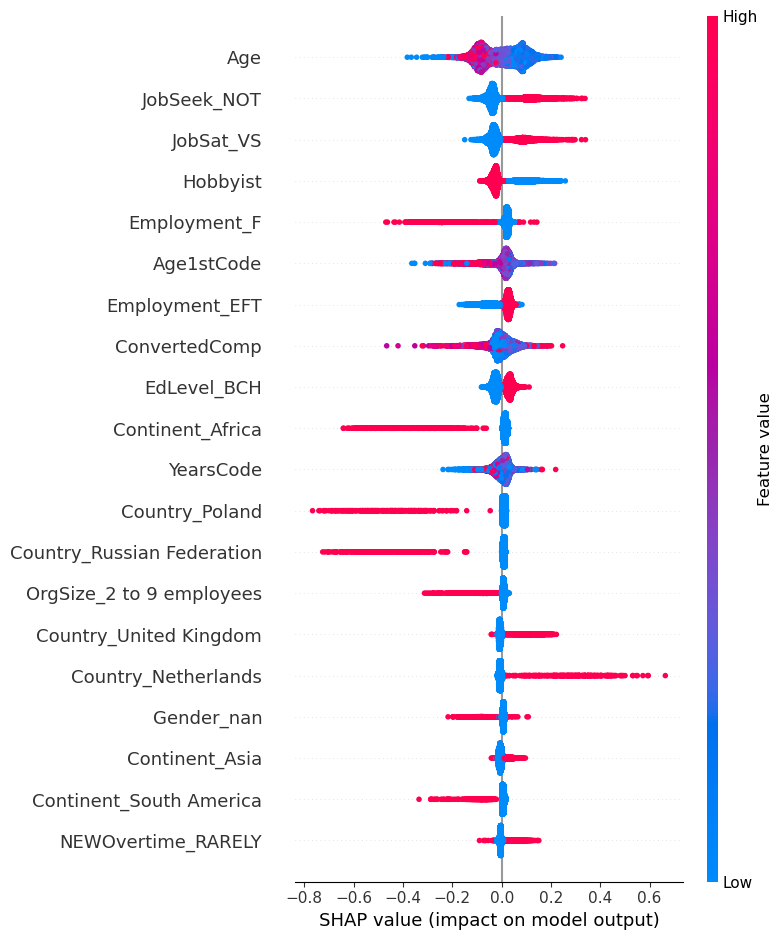

DEV


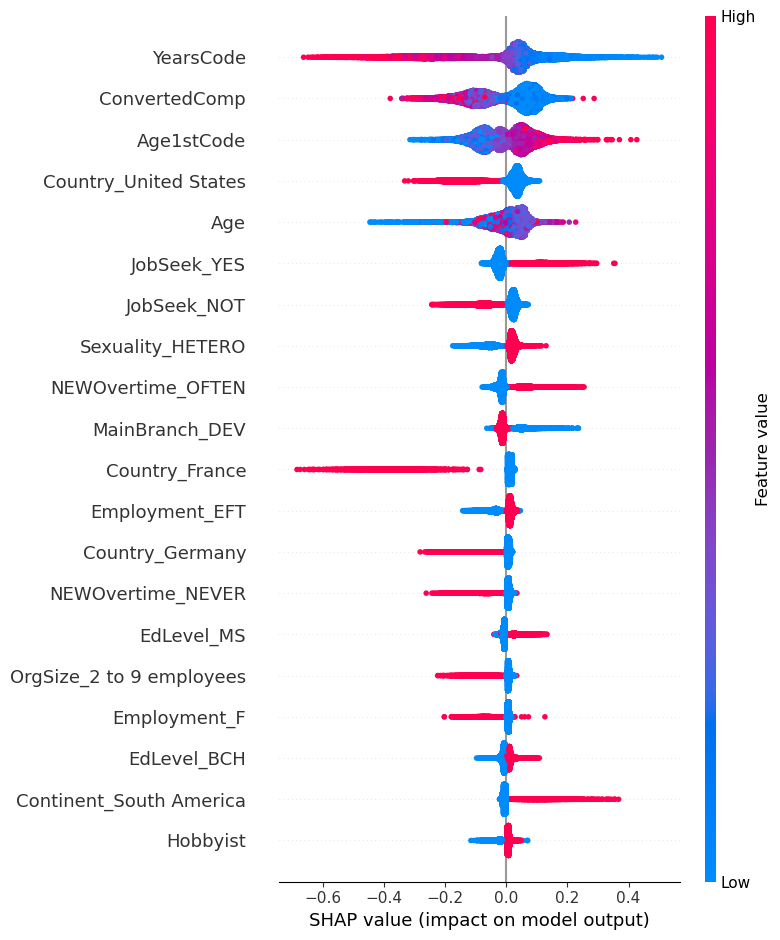

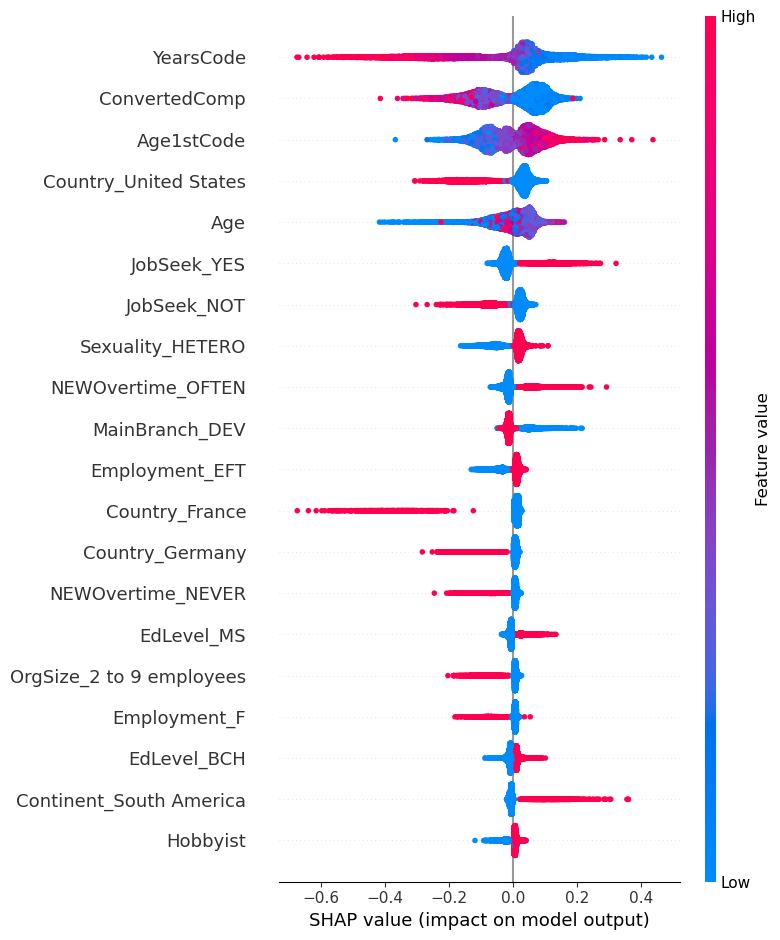

DIVERSITY


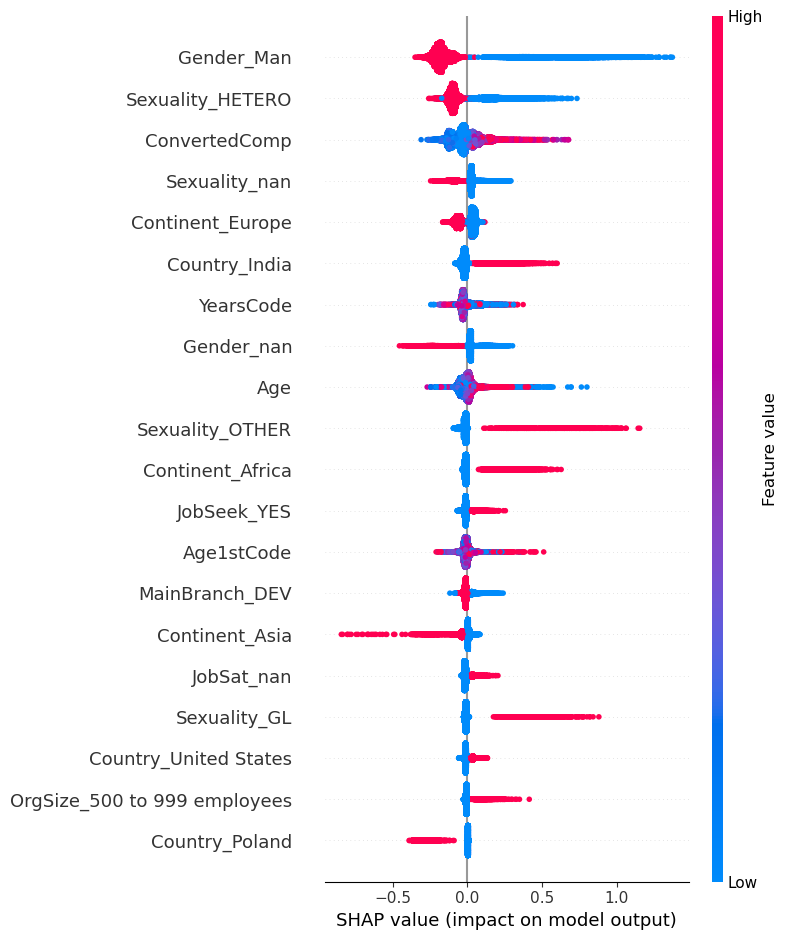

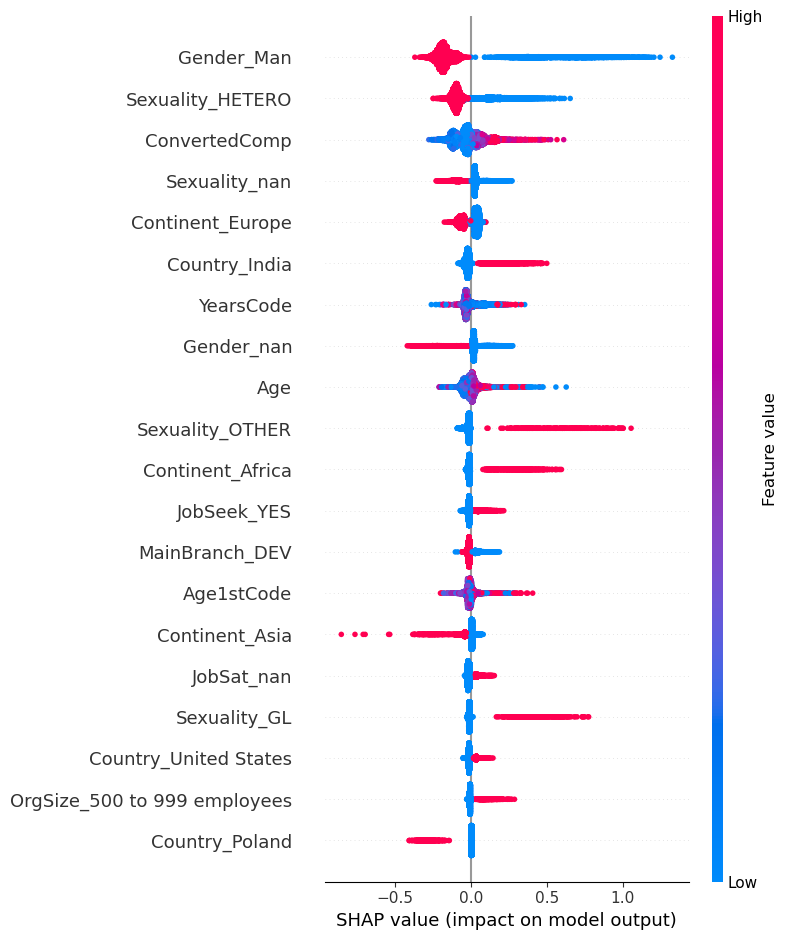

FAMILY


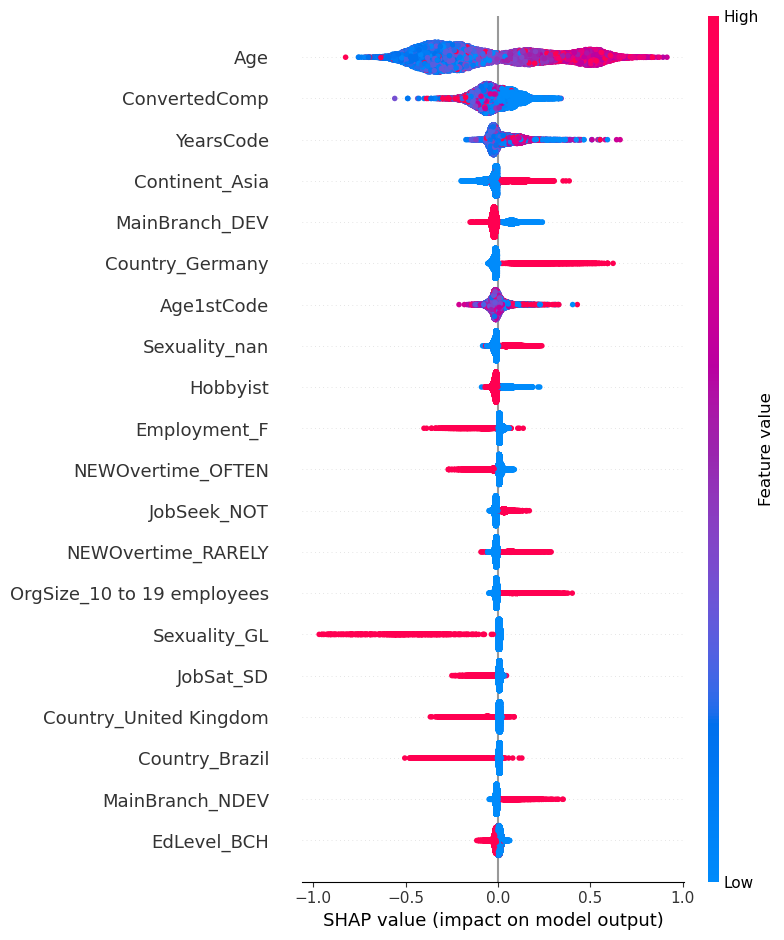

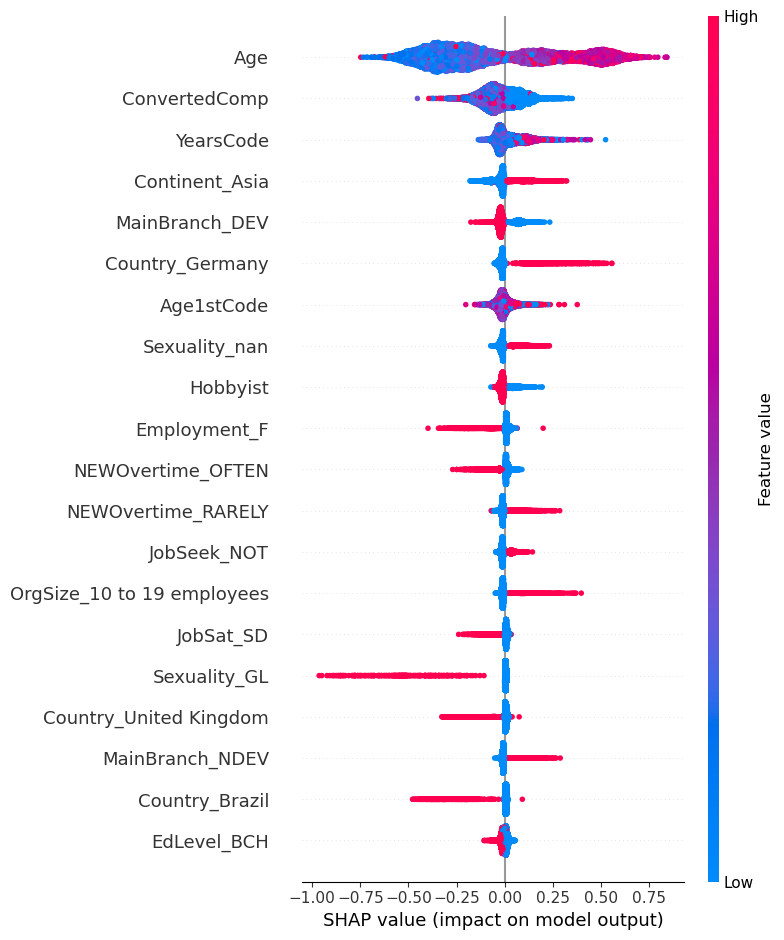

FLEX


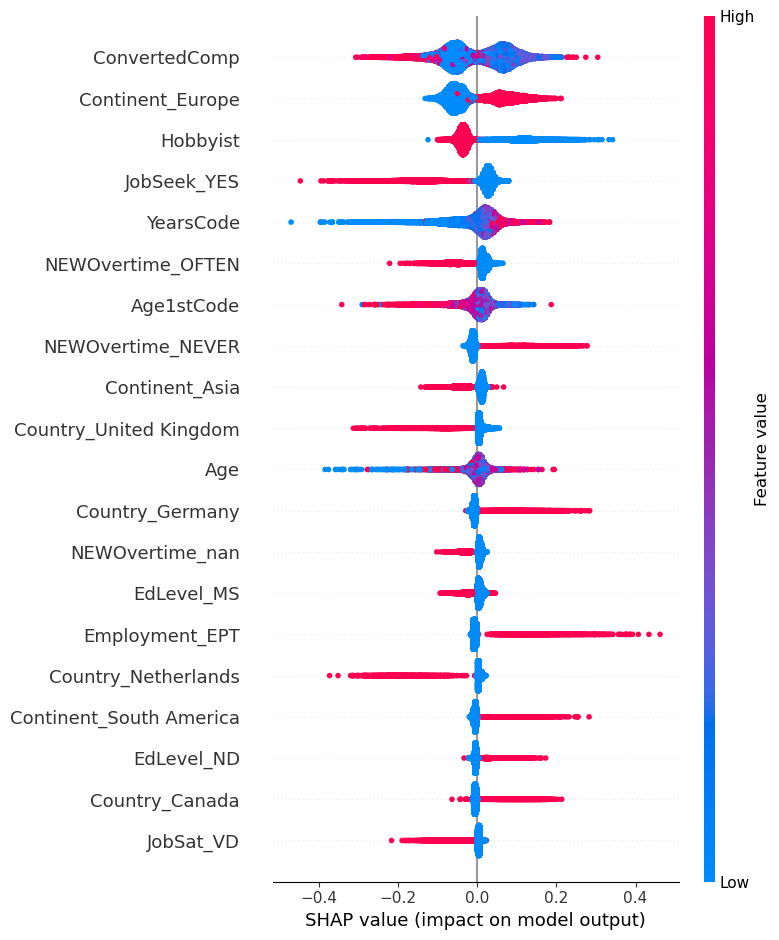

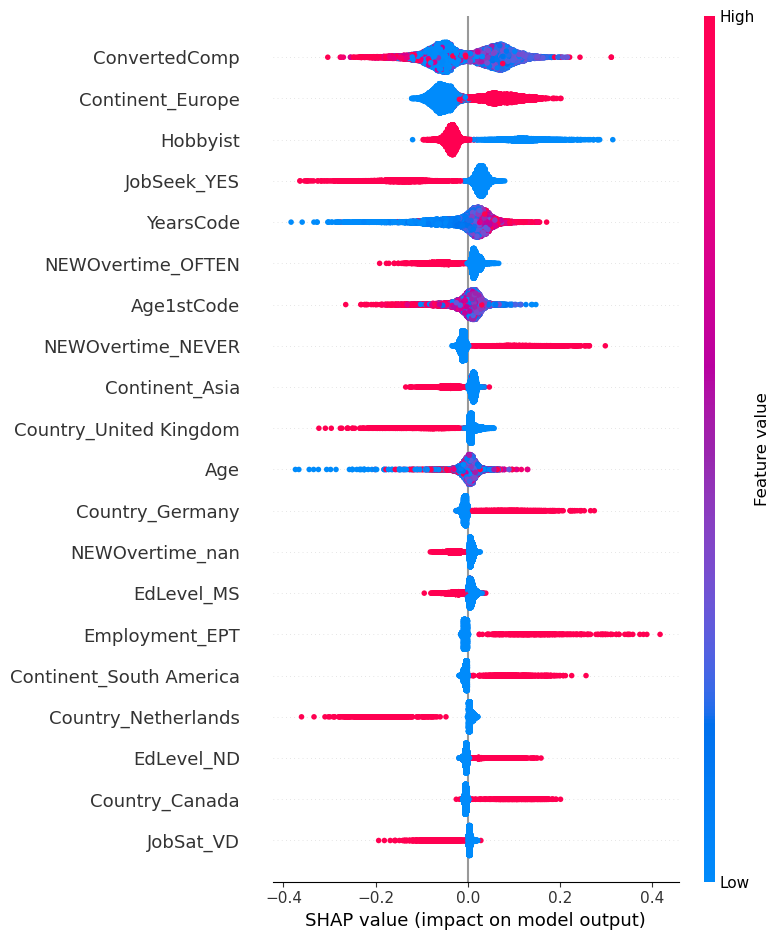

IMPACT


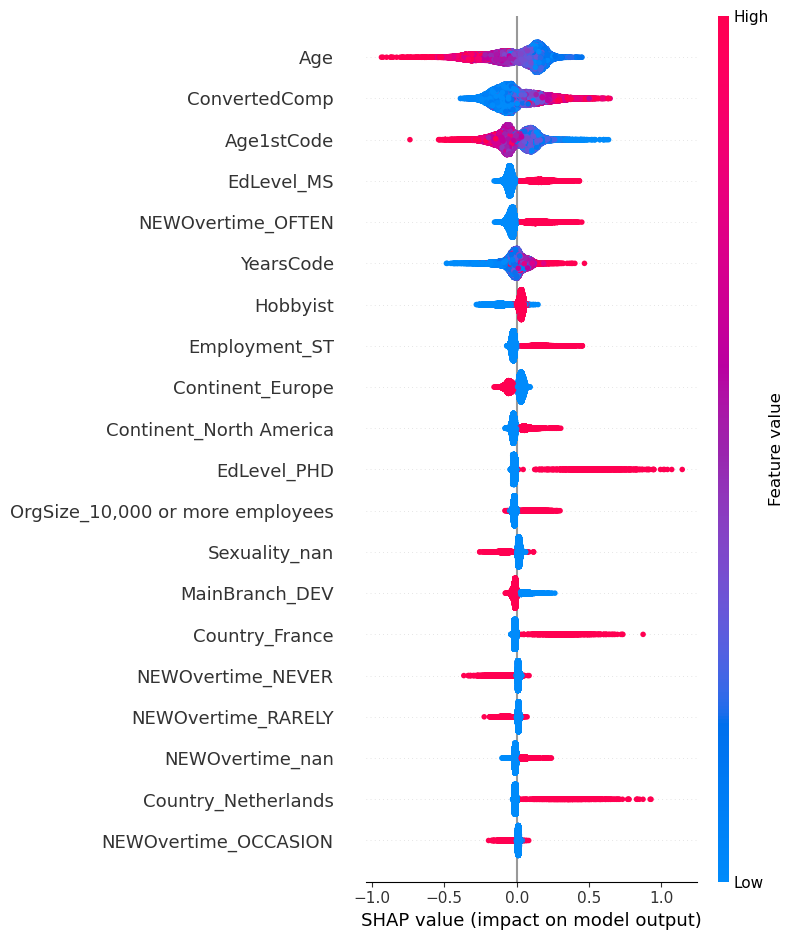

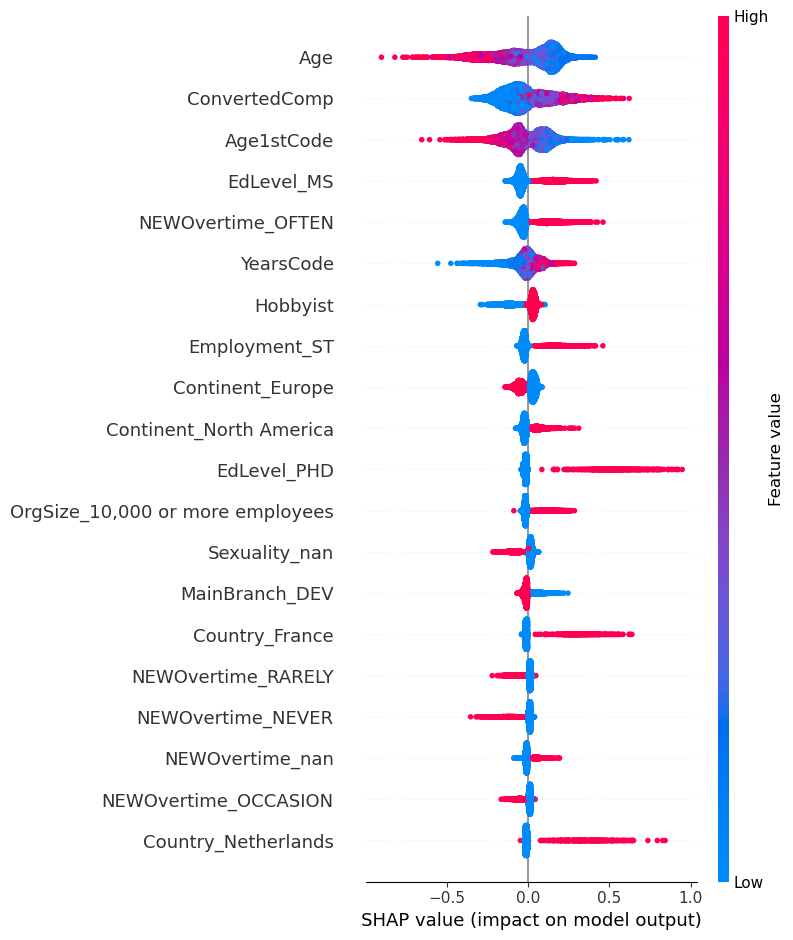

IND


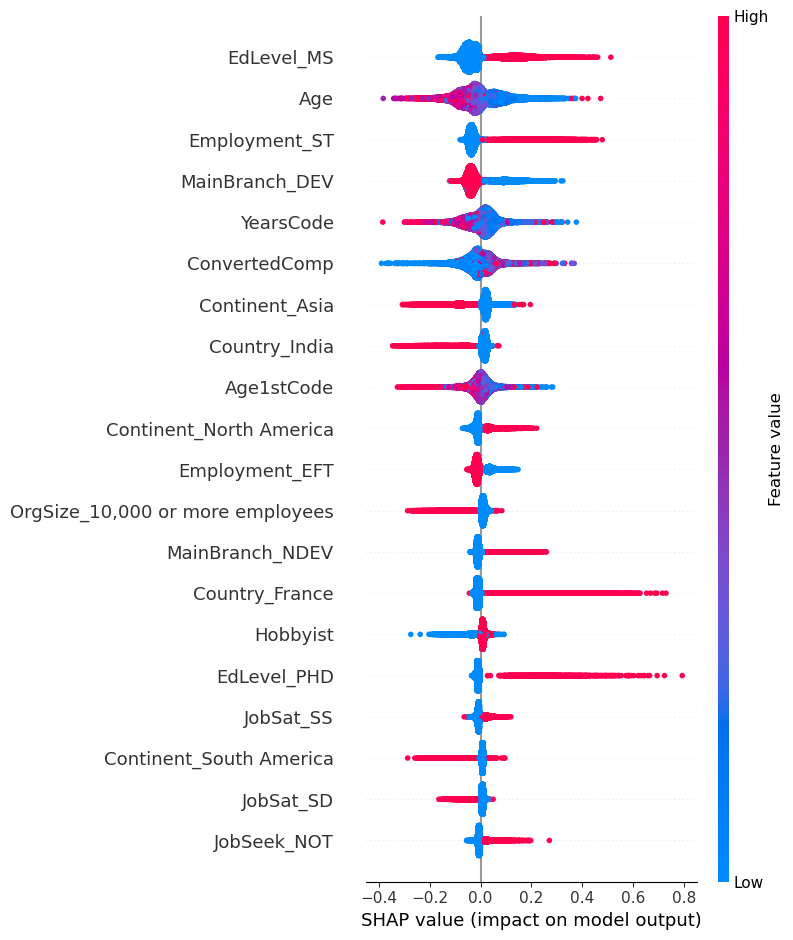

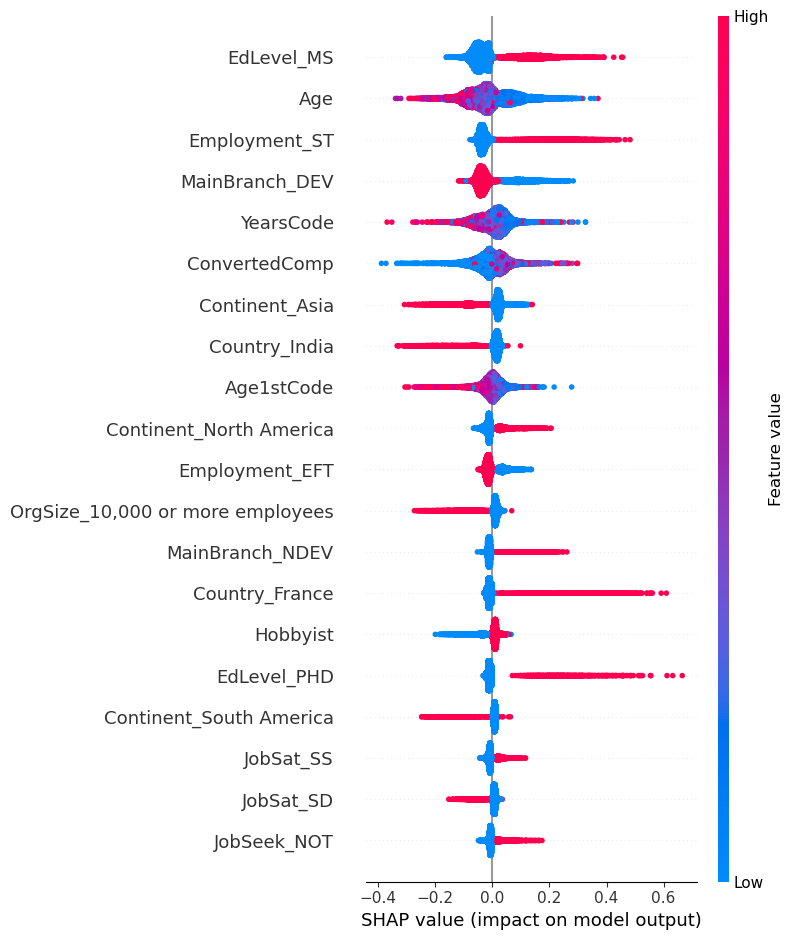

LANG


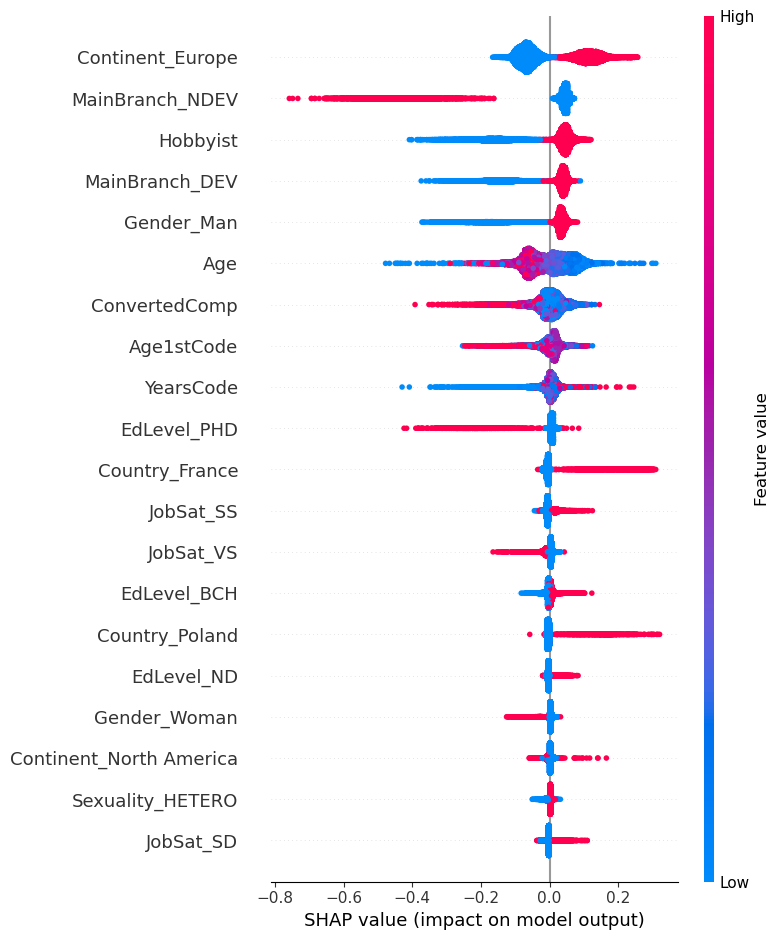

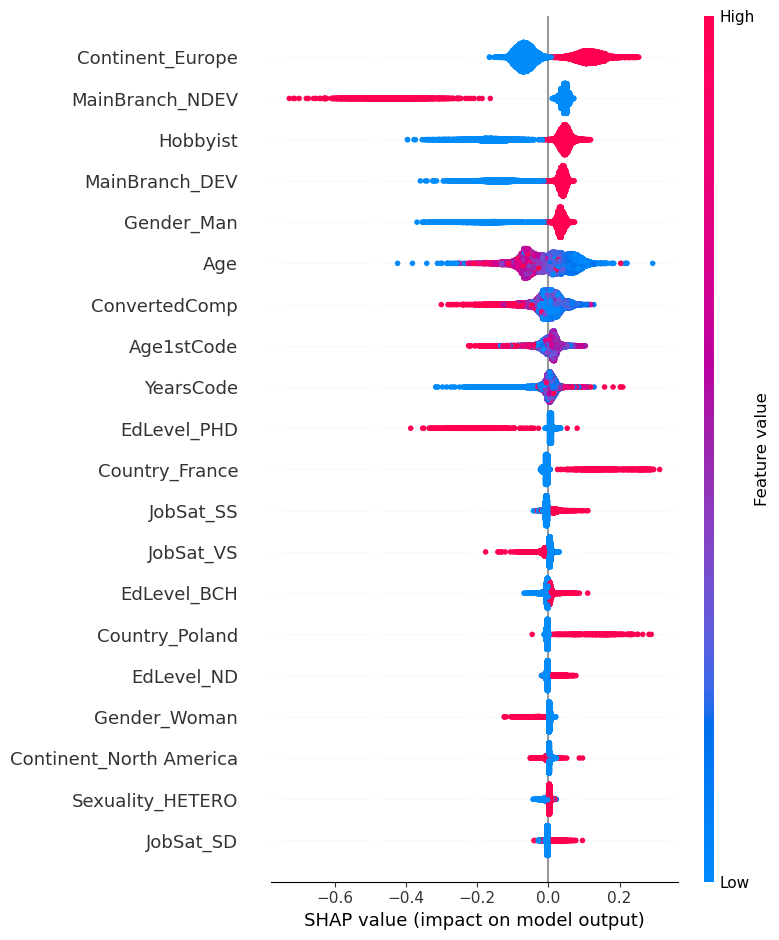

REMOTE


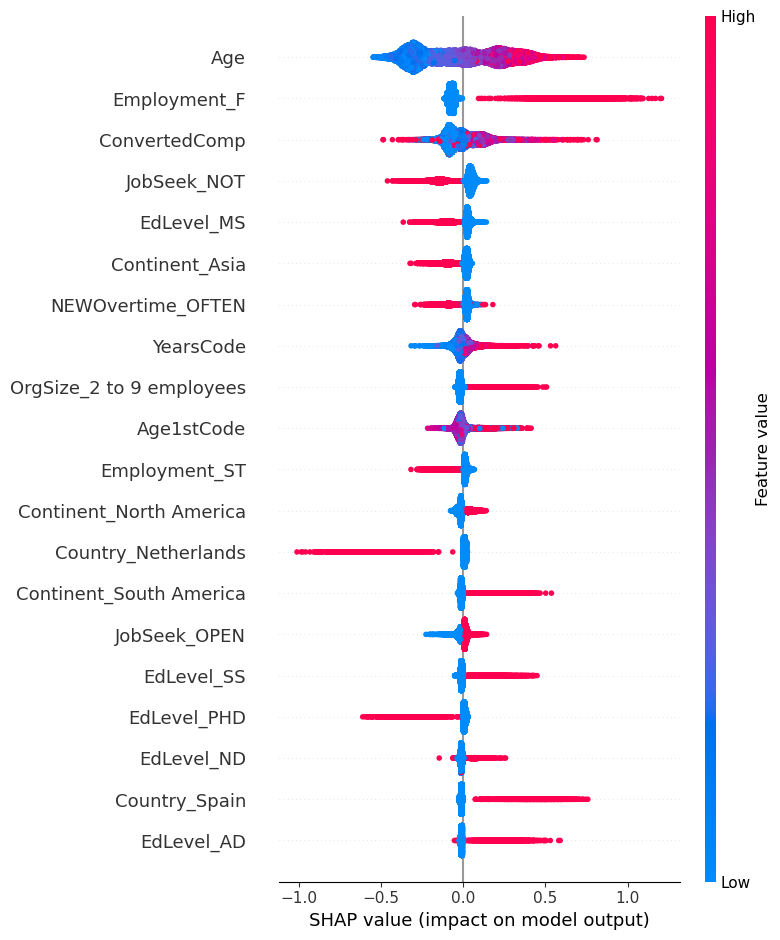

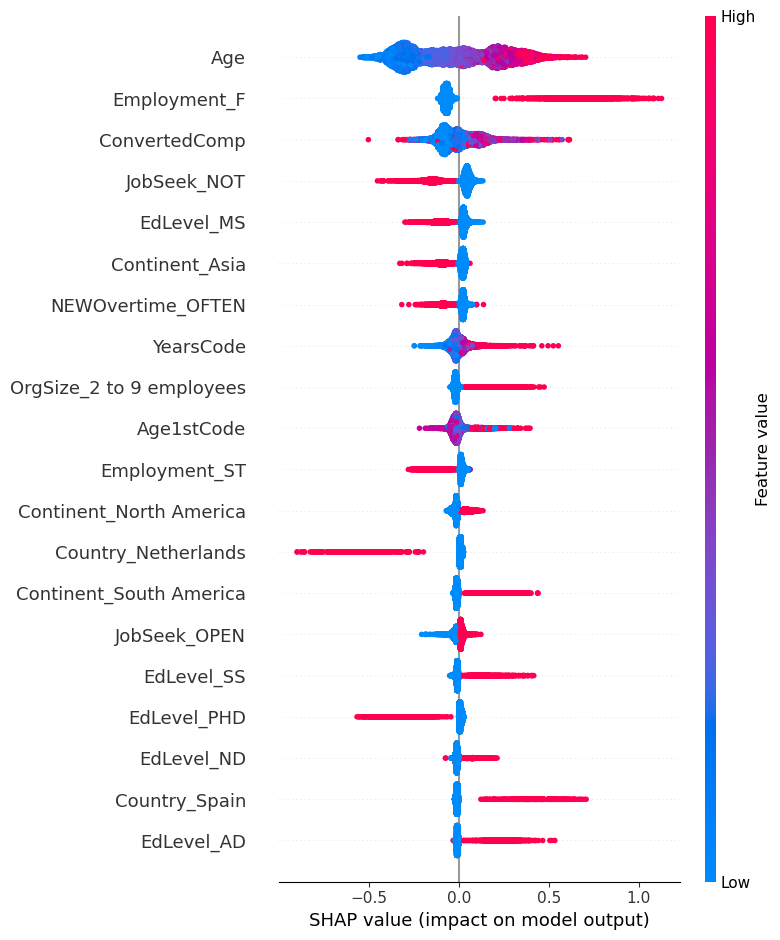

TEAM


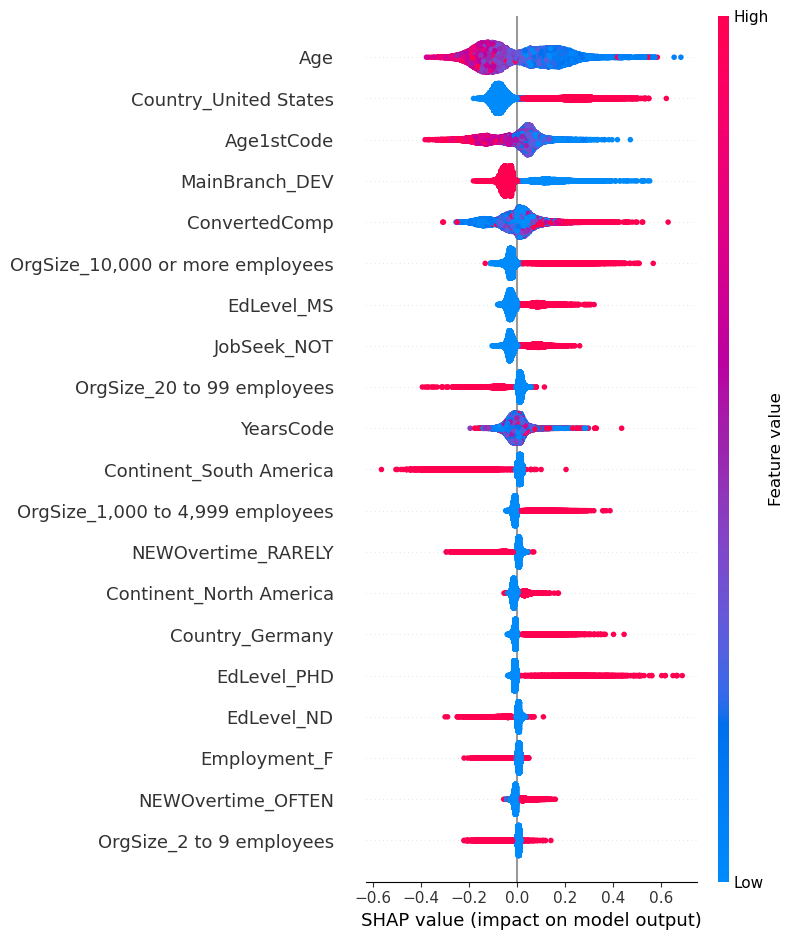

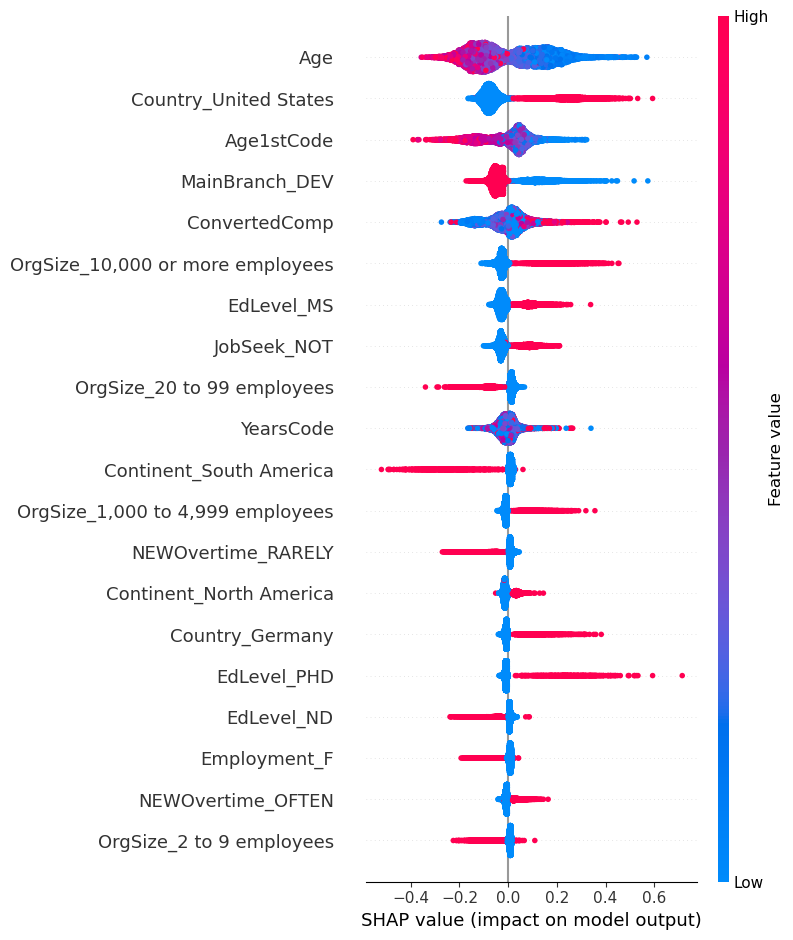

In [246]:
shap_values = {}

for feature in df_models.index:
    print(feature)
    ex, shap_train, shap_test = explain_feature(feature)
    shap_values[feature] = {'ex': ex, 'shap_train': shap_train, 'shap_test': shap_test}

In [247]:
X_ = pd.get_dummies(X)
df_full = pd.concat([X_, target_dummies], axis=1)

In [248]:
def get_corr(variables, target):
    """Get correlation coef between categorical (or binary) or continuous variables using phik package."""
    
    sign = df_full[variables + [target,]].significance_matrix()[target]
    corrs = df_full[variables + [target,]].phik_matrix()[target]
    
    return sign, corrs

In [249]:
sign, corrs = get_corr(variables=['Sexuality_HETERO', 'Gender_Man', 'Sexuality_nan', 'ConvertedComp', 'Age', 'Country_India', 'Sexuality_GL', 'Country_Poland'], target='LANG')


interval columns not set, guessing: ['ConvertedComp', 'Age']
interval columns not set, guessing: ['ConvertedComp', 'Age']


In [250]:
sign

Sexuality_HETERO      9.493775
Gender_Man           15.579583
Sexuality_nan         6.780042
ConvertedComp         2.138293
Age                   5.059009
Country_India         0.668109
Sexuality_GL          0.079296
Country_Poland        8.572338
LANG                261.397690
Name: LANG, dtype: float64

In [251]:
corrs

Sexuality_HETERO    0.067066
Gender_Man          0.109993
Sexuality_nan       0.048233
ConvertedComp       0.019739
Age                 0.036234
Country_India       0.003552
Sexuality_GL        0.000000
Country_Poland      0.060255
LANG                1.000000
Name: LANG, dtype: float64

There could be a weak correlation between LANG (Languages, frameworks, and other technologies I’d be working with) in job factor and considering a ConvertedComp. 

<div id='c'/>

# Conclusions

### **Languages, frameworks, and technologies are the most common non-salary related factors impacting job preferences.**

* Respondents' choices reveal distinct preference patterns, indicating at least four groups with differing priorities:

    * Individuals prioritizing **“Family friendliness”** show **lower** emphasis on career-related factors such as **“Specific department”, “Tech stuff”, “Professional development”, and “Industry”**.
    * Conversely, those valuing **“Work impact”** are more **inclined** to consider factors like **“Industry” and “Professional development”**.
    * Respondents favoring **“Diversity”** display **higher** interest in **company culture and office environment**, while showing **less** concern for **“Organization finance” and “Tech stuff”**. This aligns with expectations, as diversity and inclusion are valued by many organizations.
    * **“Flex time” and “Remote work options”** exhibit similarities, suggesting a group of developers prioritizing convenience and comfort in work time organization. Respondents favoring these options often overlap, leading to “Family friendliness” being a common factor, while showing less concern for their impact on reality, supporting the hypothesis of 'Convenience first'.



<br />
<center>
<img src="./data/giphy-9.gif" width=400 />
</center>


### For more details

[Stack Overflow](https://survey.stackoverflow.co/2020)

### For details on SHAP

[SHAP (SHapley Additive exPlanation)](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf)